<a href="https://colab.research.google.com/github/Jayantkhatter/Blackspots-/blob/main/BlackspotsIdentifierModel.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Import Libraries

In [ ]:
import pandas as pd #for data manipulation and analysis
import numpy as np #for working with arrays

#import data visualisation libraries
import matplotlib.pyplot as plt
import seaborn as sns

# Mount your Google drive


In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
# load dataset
blackspot_data = pd.read_csv("/content/drive/MyDrive/Colab Notebooks/Blackspot ass_1.csv")

#explore the dataset
print(blackspot_data);

        ID               EZI_ROAD_NAME              ROAD_NAME ROAD_TYPE  \
0     3699                  GROVE ROAD                  GROVE      ROAD   
1      576          BACCHUS MARSH ROAD          BACCHUS MARSH      ROAD   
2      758                GRUBBED ROAD                GRUBBED      ROAD   
3       89                VIGOR STREET                  VIGOR    STREET   
4     8773                FAIRMAN ROAD                FAIRMAN      ROAD   
...    ...                         ...                    ...       ...   
5321   256  WARBURTON-WOODS POINT ROAD  WARBURTON-WOODS POINT      ROAD   
5322  5182             GLENELG HIGHWAY                GLENELG   HIGHWAY   
5323  4196          CAPE PATERSON ROAD          CAPE PATERSON      ROAD   
5324  4352                MCPHANS ROAD                MCPHANS      ROAD   
5325   223                 ROGERS ROAD                 ROGERS      ROAD   

      AGE_LESS_THAN_15YRS_PCNT  AGE_15_24YRS_PCNT  AGE_25_44YRS_PCNT  \
0                     0.121


# **Inspect data at a glance**

In [ ]:
print('Sample size:', blackspot_data.shape[0]) # This extracts the first element (index 0) from the shape tuple, which is the number of rows in the DataFrame.


Sample size: 5326


In [ ]:
print('Sample size:', blackspot_data.shape[1])

Sample size: 36


In [ ]:
print(blackspot_data.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5326 entries, 0 to 5325
Data columns (total 36 columns):
 #   Column                           Non-Null Count  Dtype  
---  ------                           --------------  -----  
 0   ID                               5326 non-null   int64  
 1   EZI_ROAD_NAME                    5326 non-null   object 
 2   ROAD_NAME                        5326 non-null   object 
 3   ROAD_TYPE                        5326 non-null   object 
 4   AGE_LESS_THAN_15YRS_PCNT         5326 non-null   float64
 5   AGE_15_24YRS_PCNT                5326 non-null   float64
 6   AGE_25_44YRS_PCNT                5326 non-null   float64
 7   AGE_45_64YRS_PCNT                5326 non-null   float64
 8   AGE_18YRS_OVER_PCNT              5326 non-null   float64
 9   AGE_65YRS_OVER_PCNT              5317 non-null   float64
 10  SEO_PERSONS_PCNT                 5326 non-null   float64
 11  FC_COUPLE_NO_CHILDREN_PCNT       5326 non-null   float64
 12  FC_COUPLE_WITH_CHILD

In [ ]:
print(blackspot_data.shape) #It shows number of rows and columns a data set frame have

(5326, 36)


In [ ]:
blackspot_data.head(10)

ID       EZI_ROAD_NAME      ROAD_NAME ROAD_TYPE  \
0  3699          GROVE ROAD          GROVE      ROAD   
1   576  BACCHUS MARSH ROAD  BACCHUS MARSH      ROAD   
2   758        GRUBBED ROAD        GRUBBED      ROAD   
3    89        VIGOR STREET          VIGOR    STREET   
4  8773        FAIRMAN ROAD        FAIRMAN      ROAD   
5  5731     MOE-RAWSON ROAD     MOE-RAWSON      ROAD   
6  4928     ANDERSON STREET       ANDERSON    STREET   
7  6127      BENNETT STREET        BENNETT    STREET   
8  4140           PIER ROAD           PIER      ROAD   
9  3864       GORDON STREET         GORDON    STREET   

   AGE_LESS_THAN_15YRS_PCNT  AGE_15_24YRS_PCNT  AGE_25_44YRS_PCNT  \
0                  0.121988           0.058735           0.228916   
1                  0.215894           0.141722           0.312583   
2                  0.185304           0.102236           0.194888   
3                  0.167763           0.062500           0.286184   
4                  0.201238           0.108359           0.204334   
5                  0.144578           0.072289           0.162651   
6                  0.210619           0.093805           0.277876   
7                  0.143345           0.095563           0.208191   
8                  0.150000           0.057143           0.200000   
9                  0.219336           0.096681           0.222222   

   AGE_45_64YRS_PCNT  AGE_18YRS_OVER_PCNT  AGE_65YRS_OVER_PCNT  ...  \
0           0.269578             0.853916             0.320783  ...   
1           0.201325             0.741722             0.128477  ...   
2           0.348243             0.757188             0.169329  ...   
3           0.322368             0.815789             0.161184  ...   
4           0.340557             0.761610             0.145511  ...   
5           0.403614             0.828313             0.216867  ...   
6           0.276106             0.755752             0.141593  ...   
7           0.303754             0.829352             0.249147  ...   
8           0.297619             0.823810             0.295238  ...   
9           0.259740             0.735931             0.202020  ...   

   Parkland%  Primary_Production%  Lq_Licenses      Intersection  Supermarket  \
0   0.358321             0.000000         14.0  non-Intersection            0   
1   0.000000             1.000000          0.0      Intersection            0   
2   1.000000             0.000000          0.0  non-Intersection            0   
3   0.036599             0.000000          0.0  non-Intersection            0   
4   0.000000             1.000000          0.0  non-Intersection            0   
5   0.265925             0.734075          0.0  non-Intersection            0   
6   0.111573             0.000000          0.0  non-Intersection            0   
7   0.000000             0.000000          0.0      Intersection            0   
8   0.000000             0.000000          0.0  non-Intersection            0   
9   0.000000             0.000000          1.0      Intersection            0   

   primary_school  secondary_school  km_post  traffic_signal      Blackspot  
0               0                 0        0               0      Blackspot  
1               0                 0        1               0      Blackspot  
2               0                 0        0               0  non-Blackspot  
3               0                 0        0               0  non-Blackspot  
4               0                 0        0               0  non-Blackspot  
5               0                 0        1               0  non-Blackspot  
6               0                 0        0               0  non-Blackspot  
7               0                 0        0               0      Blackspot  
8               0                 0        0               0  non-Blackspot  
9               0                 0        0               0      Blackspot  

[10 rows x 36 columns]

In [ ]:
blackspot_data.tail(10)

ID               EZI_ROAD_NAME              ROAD_NAME ROAD_TYPE  \
5316  3819              TULLOCH STREET                TULLOCH    STREET   
5317  5020               ATTWOODS ROAD               ATTWOODS      ROAD   
5318  2878              MCHAFFIE DRIVE               MCHAFFIE     DRIVE   
5319  1428                 TOLSON ROAD                 TOLSON      ROAD   
5320  3404         SUNDERLAND BAY ROAD         SUNDERLAND BAY      ROAD   
5321   256  WARBURTON-WOODS POINT ROAD  WARBURTON-WOODS POINT      ROAD   
5322  5182             GLENELG HIGHWAY                GLENELG   HIGHWAY   
5323  4196          CAPE PATERSON ROAD          CAPE PATERSON      ROAD   
5324  4352                MCPHANS ROAD                MCPHANS      ROAD   
5325   223                 ROGERS ROAD                 ROGERS      ROAD   

      AGE_LESS_THAN_15YRS_PCNT  AGE_15_24YRS_PCNT  AGE_25_44YRS_PCNT  \
5316                  0.228632           0.123932           0.294872   
5317                  0.221453           0.114187           0.224913   
5318                  0.125843           0.080899           0.193258   
5319                  0.191011           0.094382           0.249438   
5320                  0.216535           0.069554           0.250656   
5321                  0.152047           0.087719           0.198830   
5322                  0.142119           0.090439           0.209302   
5323                  0.163701           0.106762           0.170819   
5324                  0.155039           0.173127           0.129199   
5325                  0.197647           0.129412           0.200000   

      AGE_45_64YRS_PCNT  AGE_18YRS_OVER_PCNT  AGE_65YRS_OVER_PCNT  ...  \
5316           0.247863             0.728632             0.104701  ...   
5317           0.332180             0.733564             0.107266  ...   
5318           0.269663             0.842697             0.330337  ...   
5319           0.334831             0.768539             0.130337  ...   
5320           0.282152             0.761155             0.181102  ...   
5321           0.385965             0.812865             0.175439  ...   
5322           0.328165             0.816537             0.229974  ...   
5323           0.352313             0.779359             0.206406  ...   
5324           0.310078             0.806202             0.232558  ...   
5325           0.301176             0.764706             0.171765  ...   

      Parkland%  Primary_Production%  Lq_Licenses      Intersection  \
5316   0.322079             0.000000          1.0  non-Intersection   
5317   0.000000             1.000000          0.0  non-Intersection   
5318   0.000000             0.000000          0.0  non-Intersection   
5319   0.000000             0.000000          0.0  non-Intersection   
5320   0.006560             0.000000          0.0  non-Intersection   
5321   1.000000             0.000000          0.0  non-Intersection   
5322   0.000000             0.155542          0.0  non-Intersection   
5323   0.000000             1.000000          0.0  non-Intersection   
5324   0.000000             1.000000          0.0  non-Intersection   
5325   0.000000             1.000000          0.0  non-Intersection   

      Supermarket  primary_school  secondary_school  km_post  traffic_signal  \
5316            0               0                 0        0               0   
5317            0               0                 0        0               0   
5318            0               0                 0        0               0   
5319            0               0                 0        0               0   
5320            0               0                 0        0               0   
5321            0               0                 0        1               0   
5322            0               0                 0        0               0   
5323            0               0                 0        1               0   
5324            0               0                 0        0            

In [ ]:
blackspot_data.sample(20)

ID                EZI_ROAD_NAME               ROAD_NAME ROAD_TYPE  \
330   6297               STODDARTS ROAD               STODDARTS      ROAD   
4689   210          OLD WESTERN HIGHWAY             OLD WESTERN   HIGHWAY   
1435  9420            SUTHERLAND STREET              SUTHERLAND    STREET   
43    2444     BAMBRA-AIREYS INLET ROAD     BAMBRA-AIREYS INLET      ROAD   
1420  4612                MULLANES ROAD                MULLANES      ROAD   
1748  6508                   NORTH ROAD                   NORTH      ROAD   
4318  6368             HENRIETTA STREET               HENRIETTA    STREET   
3670  3983                 BASS HIGHWAY                    BASS   HIGHWAY   
1865  2175                 GEELONG ROAD                 GEELONG      ROAD   
4862  2239               DUFFIELDS ROAD               DUFFIELDS      ROAD   
2843  2315           EAST WORMBETE ROAD           EAST WORMBETE      ROAD   
3639  8613              RACECOURSE ROAD              RACECOURSE      ROAD   
2621  7354  SEBASTOPOL-SMYTHESDALE ROAD  SEBASTOPOL-SMYTHESDALE      ROAD   
4907  6008                    COOK ROAD                    COOK      ROAD   
4534  8499               WEST AREA ROAD               WEST AREA      ROAD   
4044   938                DELACCAS ROAD                DELACCAS      ROAD   
4813  4453              WESTERN FREEWAY                 WESTERN   FREEWAY   
38    9303                MCDOUGAL ROAD                MCDOUGAL      ROAD   
2524  7124                   CHUTE ROAD                   CHUTE      ROAD   
483   3987            BAILLIEU STREET E                BAILLIEU    STREET   

      AGE_LESS_THAN_15YRS_PCNT  AGE_15_24YRS_PCNT  AGE_25_44YRS_PCNT  \
330                   0.224784           0.089337           0.242075   
4689                  0.144847           0.130919           0.208914   
1435                  0.233276           0.106346           0.267581   
43                    0.198895           0.091160           0.182320   
1420                  0.191235           0.111554           0.143426   
1748                  0.224586           0.148936           0.297872   
4318                  0.171355           0.138107           0.265985   
3670                  0.250000           0.097087           0.235437   
1865                  0.128378           0.069820           0.252252   
4862                  0.196787           0.090361           0.303213   
2843                  0.198895           0.091160           0.182320   
3639                  0.202532           0.068354           0.192405   
2621                  0.220844           0.138958           0.208437   
4907                  0.170543           0.102713           0.164729   
4534                  0.041002           0.022779           0.059226   
4044                  0.204509           0.098229           0.198068   
4813                  0.155039           0.173127           0.129199   
38                    0.162651           0.108434           0.156627   
2524                  0.195745           0.125532           0.217021   
483                   0.176378           0.140157           0.171654   

      AGE_45_64YRS_PCNT  AGE_18YRS_OVER_PCNT  AGE_65YRS_OVER_PCNT  ...  \
330            0.293948             0.752161             0.149856  ...   
4689           0.348189             0.816156             0.167131  ...   
1435           0.274443             0.730703             0.118353  ...   
43             0.353591             0.751381             0.174033  ...   
1420           0.386454             0.772908             0.167331  ...   
1748           0.174941             0.730496             0.153664  ...   
4318           0.271100             0.805627             0.153453  ...   
3670           0.266990             0.699029             0.150485  ...   
1865           0.272523             0.846847             0.277027  ...   
4862           0.257028             0.773092             0.152610  ...   
2843           0.353591             0.751381             0.1740

In [ ]:
x = blackspot_data.loc[blackspot_data['Blackspot']=="Blackspot"] # Print data from Only one column i.e. Blackspot
print (x)

        ID            EZI_ROAD_NAME           ROAD_NAME ROAD_TYPE  \
0     3699               GROVE ROAD               GROVE      ROAD   
1      576       BACCHUS MARSH ROAD       BACCHUS MARSH      ROAD   
7     6127           BENNETT STREET             BENNETT    STREET   
9     3864            GORDON STREET              GORDON    STREET   
89    5012  PITFIELD-SCARSDALE ROAD  PITFIELD-SCARSDALE      ROAD   
...    ...                      ...                 ...       ...   
5293  2923          SETTLEMENT ROAD          SETTLEMENT      ROAD   
5299  2079             GEELONG ROAD             GEELONG      ROAD   
5303  8216              HAWKEY ROAD              HAWKEY      ROAD   
5309   547            SYDNEY STREET              SYDNEY    STREET   
5310  3349      PHILLIP ISLAND ROAD      PHILLIP ISLAND      ROAD   

      AGE_LESS_THAN_15YRS_PCNT  AGE_15_24YRS_PCNT  AGE_25_44YRS_PCNT  \
0                     0.121988           0.058735           0.228916   
1                     0.215

# **`Inspect missing data`**

In [ ]:
#Count missing data using isna,sum with loop
for j in blackspot_data.iloc[:,0:]:
  miss=blackspot_data[j].isna().sum()
  print(j,'missing: ', miss)

ID missing:  0
EZI_ROAD_NAME missing:  0
ROAD_NAME missing:  0
ROAD_TYPE missing:  0
AGE_LESS_THAN_15YRS_PCNT missing:  0
AGE_15_24YRS_PCNT missing:  0
AGE_25_44YRS_PCNT missing:  0
AGE_45_64YRS_PCNT missing:  0
AGE_18YRS_OVER_PCNT missing:  0
AGE_65YRS_OVER_PCNT missing:  9
SEO_PERSONS_PCNT missing:  0
FC_COUPLE_NO_CHILDREN_PCNT missing:  0
FC_COUPLE_WITH_CHILDREN_PCNT missing:  0
FC_SINGLE_PARENT missing:  0
CARS_ZERO_HH_PCNT missing:  0
CARS_ONE_HH_PCNT missing:  0
CARS_TWO_OR_MORE_HH_PCNT missing:  0
DWELLING_SEP_HOUSE_PCNT missing:  0
DWELLING_SEMID_RO_OR_TCE_H_TH_P missing:  0
DWELLING_FLAT_UNIT_APART_PCNT missing:  0
OCCUPATION_WHITE_COLLAR_PCNT missing:  0
OCCUPATION_BLUE_COLLAR_PCNT missing:  0
SEIFA missing:  0
Commercial% missing:  0
Industrial% missing:  0
Residential% missing:  0
Parkland% missing:  0
Primary_Production% missing:  0
Lq_Licenses missing:  6
Intersection missing:  0
Supermarket missing:  0
primary_school missing:  0
secondary_school missing:  0
km_post missi

# Numerical analysis and visualisation

To check how many blackspots are there in the data

In [ ]:
blackspot_data.Blackspot.describe().astype(object)

count              5326
unique                2
top       non-Blackspot
freq               4759
Name: Blackspot, dtype: object

In [ ]:
from sklearn.preprocessing import LabelEncoder

encoder = LabelEncoder()

columns_to_encode = ['Blackspot']
for column in columns_to_encode:
    blackspot_data[column + '_N'] = encoder.fit_transform(blackspot_data[column])

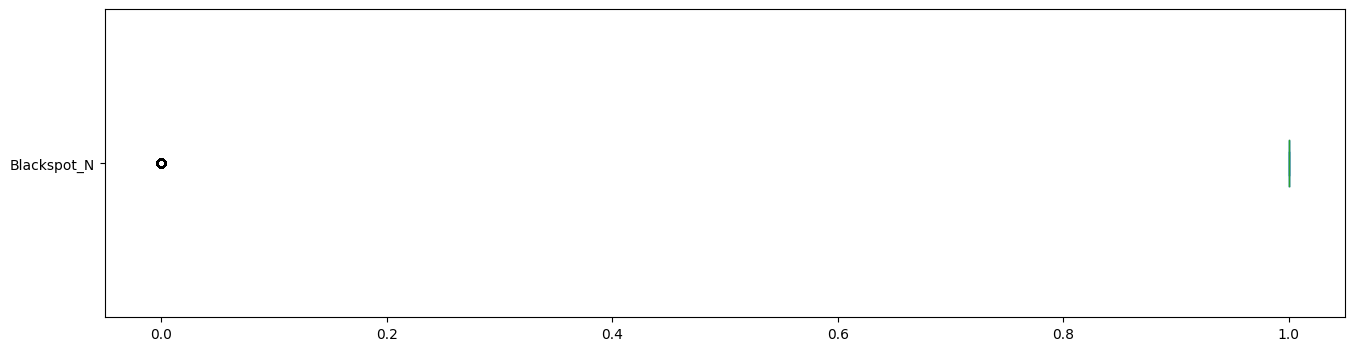

In [ ]:
ax = blackspot_data.Blackspot_N.plot(kind='box', vert=False, figsize=(16,4))
ax.xaxis.get_major_formatter().set_scientific(False) #converting Blackspot to numeric value tto plot

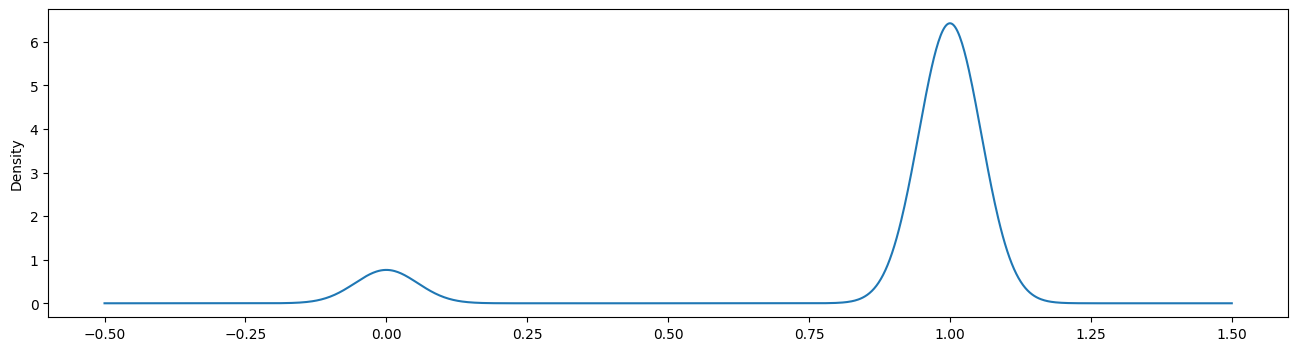

In [ ]:
ax = blackspot_data.Blackspot_N.plot(kind='density', figsize=(16,4))
ax.xaxis.get_major_formatter().set_scientific(False)

In [ ]:
ax = blackspot_data.Blackspot_N.plot(kind='density', figsize=(16,4))
ax.xaxis.get_major_formatter().set_scientific(False)
ax.axvline(blackspot_data.Blackspot_N.mean(), color='red')
ax.axvline(blackspot_data.Blackspot_N.median(), color='green')

In [ ]:
blackspot_data['ROAD_TYPE'].unique()

array(['ROAD', 'STREET', 'HIGHWAY', 'DRIVE', 'WAY', 'FREEWAY'],
      dtype=object)

In [ ]:
blackspot_data['ROAD_TYPE'].value_counts()

ROAD       3400
STREET     1324
DRIVE       295
HIGHWAY     180
WAY          77
FREEWAY      50
Name: ROAD_TYPE, dtype: int64

<Axes: ylabel='ROAD_TYPE'>

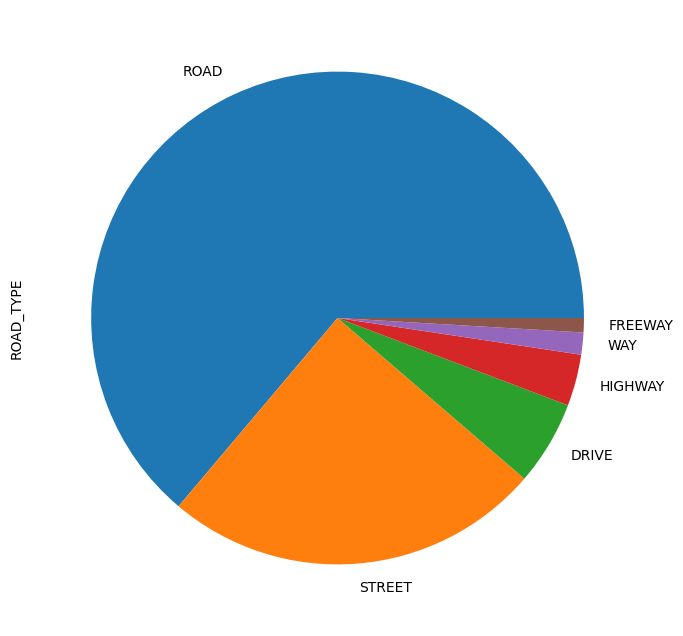

In [ ]:
blackspot_data['ROAD_TYPE'].value_counts().plot(kind='pie', figsize=(12,8))

Text(0, 0.5, 'Types of Road')

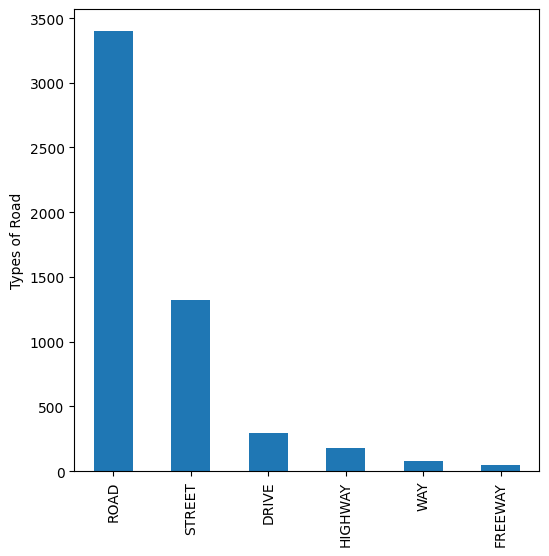

In [ ]:
ax = blackspot_data['ROAD_TYPE'].value_counts().plot(kind='bar', figsize=(6,6))
ax.set_ylabel('Types of Road')

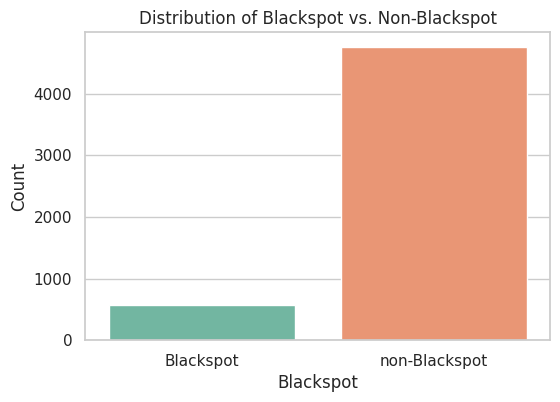

In [ ]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Count the occurrences of 'Blackspot' and 'Non-Blackspot'
blackspot_counts = blackspot_data['Blackspot'].value_counts()

# Create a count plot
sns.set(style="whitegrid")
plt.figure(figsize=(6, 4))
sns.countplot(x='Blackspot', data=blackspot_data, palette="Set2")

# Adding labels and title
plt.xlabel('Blackspot')
plt.ylabel('Count')
plt.title('Distribution of Blackspot vs. Non-Blackspot')

plt.show()


To check how many blackspots are there against the intersection column


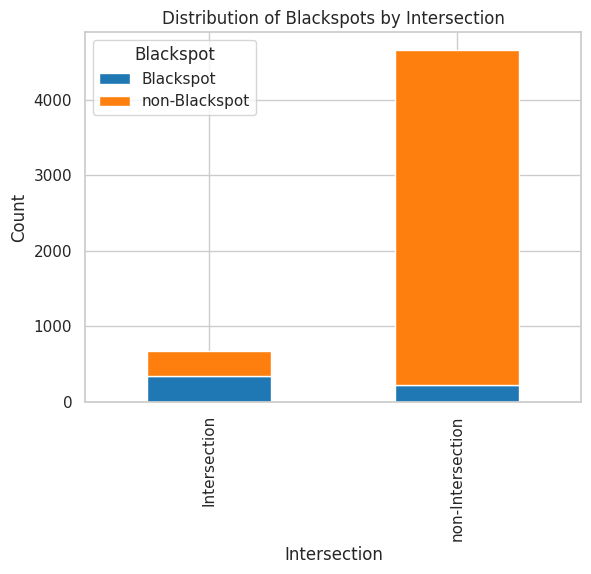

In [ ]:
# Create a pivot table to calculate the counts
pivot_table = pd.pivot_table(blackspot_data, index='Intersection', columns='Blackspot', aggfunc='size', fill_value=0)

# Create a stacked bar chart
sns.set(style="whitegrid")
pivot_table.plot(kind='bar', stacked=True, color=["#1f77b4", "#ff7f0e"])

# Adding labels and title
plt.xlabel('Intersection')
plt.ylabel('Count')
plt.title('Distribution of Blackspots by Intersection')

plt.legend(title='Blackspot')
plt.show()

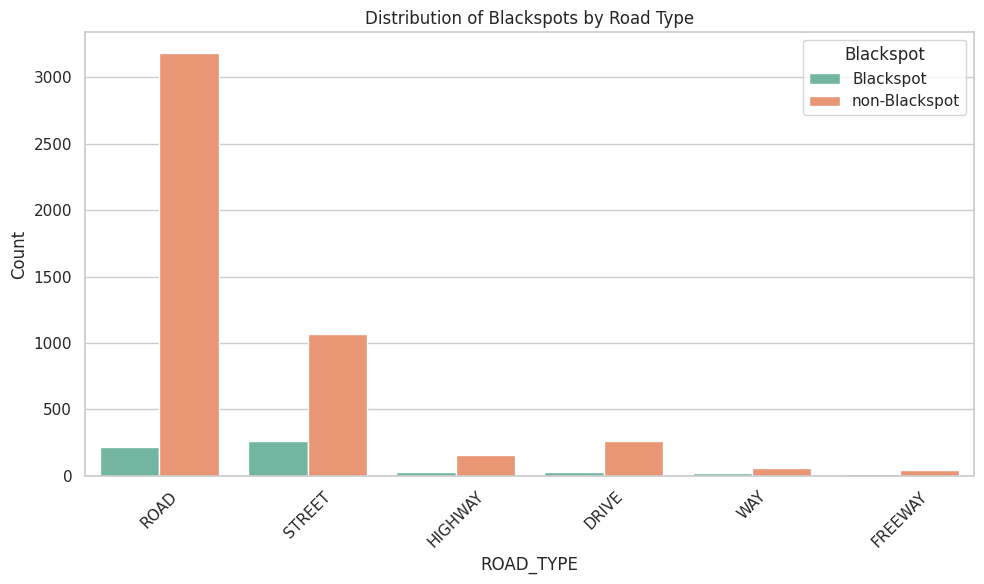

In [ ]:
# Create a count plot
sns.set(style="whitegrid")
plt.figure(figsize=(10, 6))
sns.countplot(x='ROAD_TYPE', hue='Blackspot', data=blackspot_data, palette="Set2")

# Adding labels and title
plt.xlabel('ROAD_TYPE')
plt.ylabel('Count')
plt.title('Distribution of Blackspots by Road Type')

plt.legend(title='Blackspot')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

## Correlation plot

<ipython-input-25-c3417bdd216d>:3: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  corr = blackspot_data.corr()
<ipython-input-25-c3417bdd216d>:4: DeprecationWarning: `np.bool` is a deprecated alias for the builtin `bool`. To silence this warning, use `bool` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.bool_` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  sns.heatmap(corr, mask=np.zeros_like(corr, dtype=np.bool), cmap=sns.diverging_palette(240,10,as_cmap=True),


<Axes: >

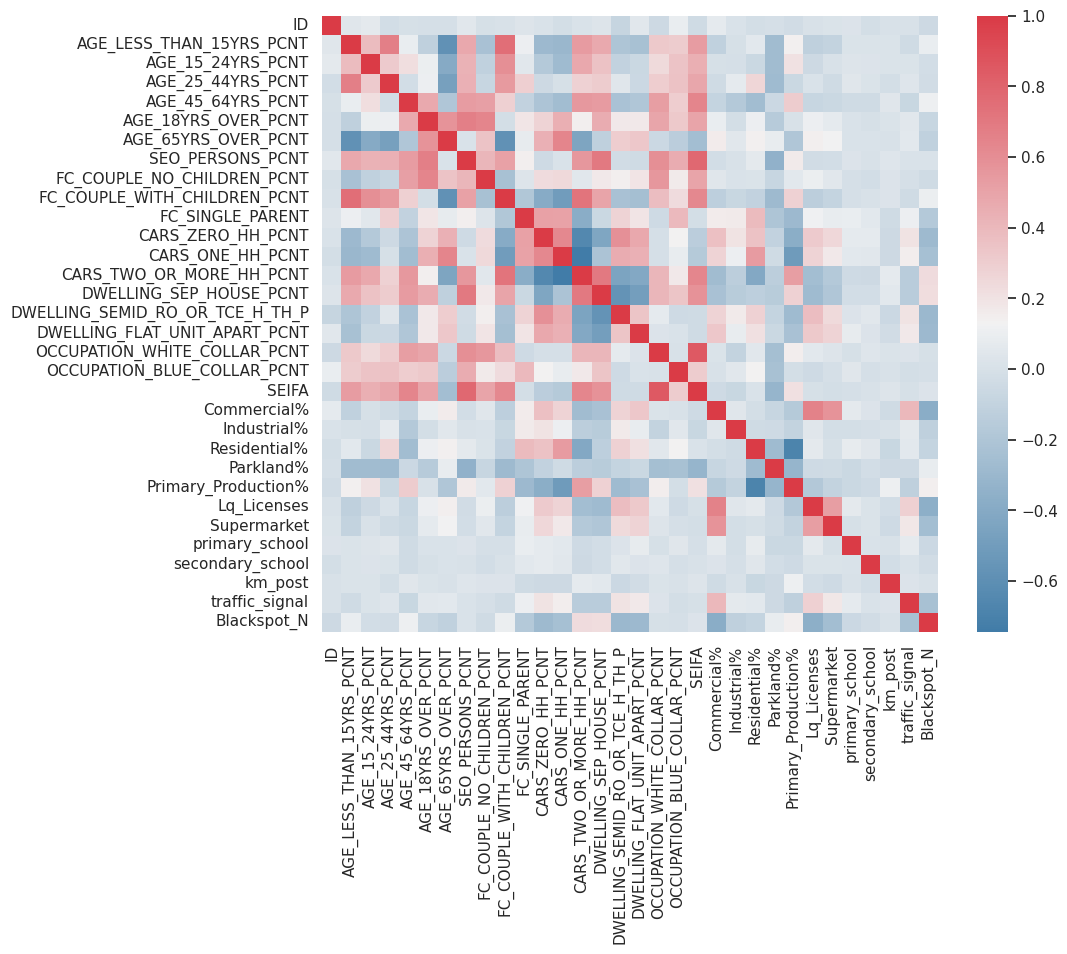

In [ ]:
# Correlation plot
f, ax = plt.subplots(figsize=(10, 8))
corr = blackspot_data.corr()
sns.heatmap(corr, mask=np.zeros_like(corr, dtype=np.bool), cmap=sns.diverging_palette(240,10,as_cmap=True),
            square=True, ax=ax)


# #Conduct Exploratory Data Analysis - EDA
Stats and visualtion

  1.Univariate analysis

  2.Bivariate analysis

  3.Multivariate analysis

## Univariate analysis

Univariate analysis visualises data distribution for each variable at a time

In [ ]:
#descriptive stats for numerical variables
blackspot_data.describe()

ID  AGE_LESS_THAN_15YRS_PCNT  AGE_15_24YRS_PCNT  \
count  5326.000000               5326.000000        5326.000000   
mean   4996.381149                  0.175456           0.099507   
std    2885.736141                  0.050574           0.030945   
min       1.000000                  0.000000           0.000000   
25%    2477.000000                  0.144847           0.079897   
50%    5020.500000                  0.177419           0.102041   
75%    7478.750000                  0.205817           0.123007   
max    9999.000000                  0.329241           0.198113   

       AGE_25_44YRS_PCNT  AGE_45_64YRS_PCNT  AGE_18YRS_OVER_PCNT  \
count        5326.000000        5326.000000          5326.000000   
mean            0.202988           0.306965             0.774056   
std             0.054621           0.067690             0.102008   
min             0.000000           0.000000             0.000000   
25%             0.172337           0.274064             0.751515   
50%             0.197248           0.317073             0.778723   
75%             0.234266           0.348189             0.816156   
max             0.608696           0.490798             1.000000   

       AGE_65YRS_OVER_PCNT  SEO_PERSONS_PCNT  FC_COUPLE_NO_CHILDREN_PCNT  \
count          5317.000000       5326.000000                 5326.000000   
mean              0.202530          0.884964                    0.443514   
std               0.105217          0.107473                    0.105680   
min               0.000000          0.000000                    0.000000   
25%               0.149367          0.870588                    0.387283   
50%               0.181102          0.896985                    0.450000   
75%               0.237288          0.927536                    0.500000   
max               1.000000          1.000000                    1.088235   

       FC_COUPLE_WITH_CHILDREN_PCNT  ...  Residential%    Parkland%  \
count                   5326.000000  ...   5326.000000  5326.000000   
mean                       0.401426  ...      0.393237     0.137413   
std                        0.114858  ...      0.413405     0.277777   
min                        0.000000  ...      0.000000     0.000000   
25%                        0.342105  ...      0.000000     0.000000   
50%                        0.406977  ...      0.226550     0.000000   
75%                        0.477124  ...      0.832911     0.114782   
max                        0.785714  ...      1.000000     1.000000   

       Primary_Production%  Lq_Licenses  Supermarket  primary_school  \
count          5326.000000  5320.000000  5326.000000     5326.000000   
mean              0.375253     0.378008     0.012580        0.025535   
std               0.431760     1.550966     0.111462        0.157758   
min               0.000000     0.000000     0.000000        0.000000   
25%               0.000000     0.000000     0.000000        0.000000   
50%               0.081297     0.000000     0.000000        0.000000   
75%               0.962690     0.000000     0.000000        0.000000   
max               1.000000    26.000000     1.000000        1.000000   

       secondary_school      km_post  traffic_signal  Blackspot_N  
count       5326.000000  5326.000000     5326.000000  5326.000000  
mean           0.004506     0.127488        0.022343     0.893541  
std            0.066983     0.333550        0.147811     0.308453  
min            0.000000     0.000000        0.000000     0.000000  
25%            0.000000     0.000000        0.000000     1.000000  
50%            0.000000     0.000000        0.000000     1.000000  
75%            0.000000     0.000000        0.000000     1.000000  
max            1.000000     1.000000        1.000000     1.000000  

[8 rows x 32 columns]

In [ ]:
  #set the formatting for floating numbers
  pd.set_option('display.float_format', lambda x: '%.3f' % x)

  #summarise categorical columns as well
  data_types =['object', 'float', 'int']
  blackspot_data.describe(include=data_types)

ID EZI_ROAD_NAME ROAD_NAME ROAD_TYPE  AGE_LESS_THAN_15YRS_PCNT  \
count  5326.000          5326      5326      5326                  5326.000   
unique      NaN          2185      2020         6                       NaN   
top         NaN  BASS HIGHWAY   PRINCES      ROAD                       NaN   
freq        NaN            52        75      3400                       NaN   
mean   4996.381           NaN       NaN       NaN                     0.175   
std    2885.736           NaN       NaN       NaN                     0.051   
min       1.000           NaN       NaN       NaN                     0.000   
25%    2477.000           NaN       NaN       NaN                     0.145   
50%    5020.500           NaN       NaN       NaN                     0.177   
75%    7478.750           NaN       NaN       NaN                     0.206   
max    9999.000           NaN       NaN       NaN                     0.329   

        AGE_15_24YRS_PCNT  AGE_25_44YRS_PCNT  AGE_45_64YRS_PCNT  \
count            5326.000           5326.000           5326.000   
unique                NaN                NaN                NaN   
top                   NaN                NaN                NaN   
freq                  NaN                NaN                NaN   
mean                0.100              0.203              0.307   
std                 0.031              0.055              0.068   
min                 0.000              0.000              0.000   
25%                 0.080              0.172              0.274   
50%                 0.102              0.197              0.317   
75%                 0.123              0.234              0.348   
max                 0.198              0.609              0.491   

        AGE_18YRS_OVER_PCNT  AGE_65YRS_OVER_PCNT  ...  Primary_Production%  \
count              5326.000             5317.000  ...             5326.000   
unique                  NaN                  NaN  ...                  NaN   
top                     NaN                  NaN  ...                  NaN   
freq                    NaN                  NaN  ...                  NaN   
mean                  0.774                0.203  ...                0.375   
std                   0.102                0.105  ...                0.432   
min                   0.000                0.000  ...                0.000   
25%                   0.752                0.149  ...                0.000   
50%                   0.779                0.181  ...                0.081   
75%                   0.816                0.237  ...                0.963   
max                   1.000                1.000  ...                1.000   

        Lq_Licenses      Intersection  Supermarket  primary_school  \
count      5320.000              5326     5326.000        5326.000   
unique          NaN                 2          NaN             NaN   
top             NaN  non-Intersection          NaN             NaN   
freq            NaN              4659          NaN             NaN   
mean          0.378               NaN        0.013           0.026   
std           1.551               NaN        0.111           0.158   
min           0.000               NaN        0.000           0.000   
25%           0.000               NaN        0.000           0.000   
50%           0.000               NaN        0.000           0.000   
75%           0.000               NaN        0.000           0.000   
max          26.000               NaN        1.000           1.000   

        secondary_school  km_post  traffic_signal      Blackspot  Blackspot_N  
count           5326.000 5326.000        5326.000           5326     5326.000  
unique               NaN      NaN             NaN              2          NaN  
top                  NaN      NaN             NaN  non-Blackspot          NaN  
freq                 NaN      NaN             NaN           4759          NaN  
mean               0.005    0.127           0.022            NaN        0.894  
s

# Explore each numerical variable

In [ ]:
#explore each numerical variable
print('Age 18 Years over mean: ', (blackspot_data['AGE_18YRS_OVER_PCNT'].mean()))
print('Age 18 Years over meadian: ', (blackspot_data['AGE_18YRS_OVER_PCNT'].median()))
print('Age 18 Years over min: ', (blackspot_data['AGE_18YRS_OVER_PCNT'].min()))
print('Age 18 Years over max: ', (blackspot_data['AGE_18YRS_OVER_PCNT'].max()))
print('Age 18 Years over std: ', (blackspot_data['AGE_18YRS_OVER_PCNT'].std()))

Age 18 Years over mean:  0.7740558899797222
Age 18 Years over meadian:  0.778723404
Age 18 Years over min:  0.0
Age 18 Years over max:  1.0
Age 18 Years over std:  0.10200828546836403


<Axes: >

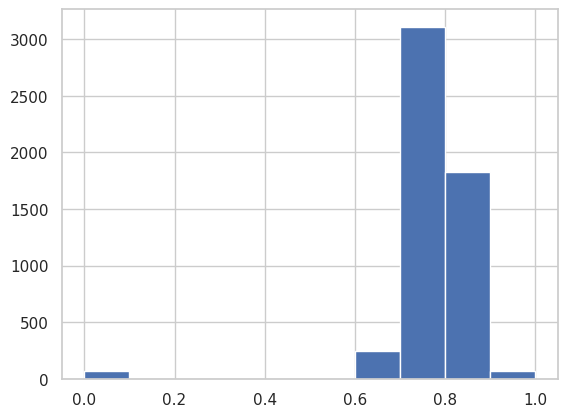

In [ ]:
#Visualise a numerical variable using histrograms using matplot
blackspot_data.AGE_18YRS_OVER_PCNT.hist()

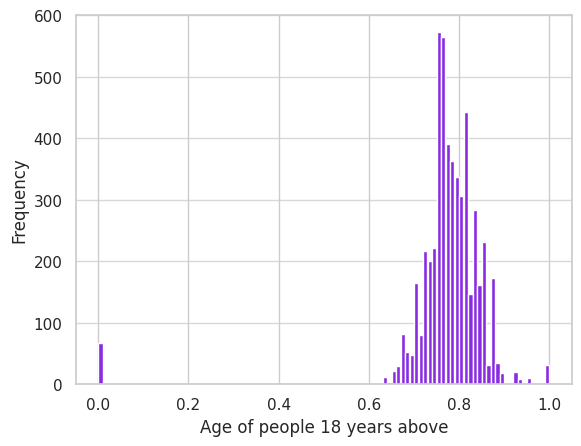

In [ ]:
blackspot_data['AGE_18YRS_OVER_PCNT'].plot.hist(grid=True, bins=100, rwidth=0.95, color='#8A2BE2')
plt.xlabel('Age of people 18 years above')
plt.ylabel('Frequency')
plt.grid(axis='y', alpha=0.75)

<Axes: xlabel='AGE_18YRS_OVER_PCNT', ylabel='Count'>

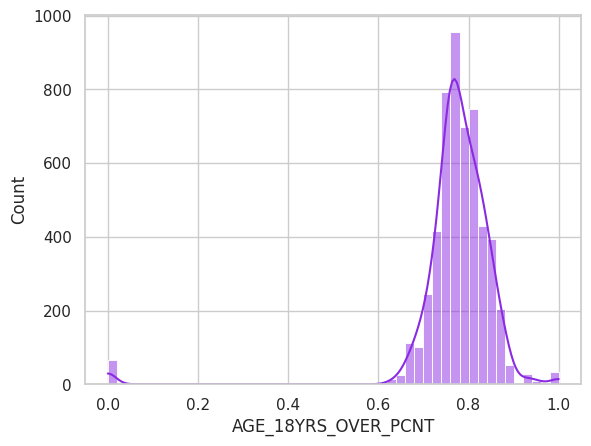

In [ ]:
#using seaborn
sns.histplot(data=blackspot_data, x='AGE_18YRS_OVER_PCNT', bins=50, kde=True, color = '#8A2BE2')

<Axes: xlabel='AGE_18YRS_OVER_PCNT'>

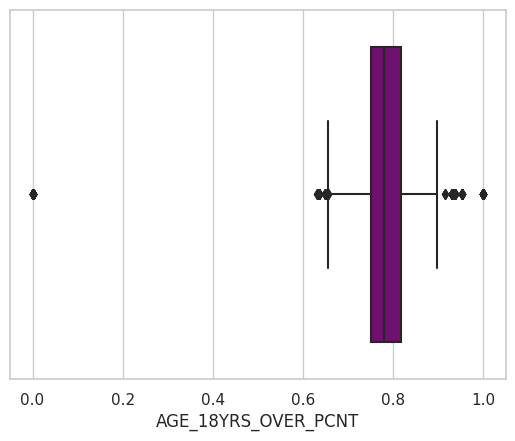

In [ ]:
sns.boxplot(x=blackspot_data['AGE_18YRS_OVER_PCNT'], color='purple')

<Axes: xlabel='AGE_18YRS_OVER_PCNT'>

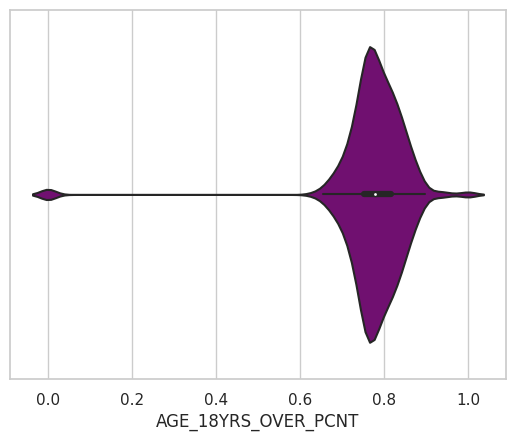

In [ ]:
sns.violinplot(x=blackspot_data['AGE_18YRS_OVER_PCNT'], color='purple')

left kdepolt and swamplot

### Explore each categorical variable

In [ ]:
#describe categorical variables
print(blackspot_data['Intersection'].describe(include='object'))
print(blackspot_data['Blackspot'].describe())

count                 5326
unique                   2
top       non-Intersection
freq                  4659
Name: Intersection, dtype: object
count              5326
unique                2
top       non-Blackspot
freq               4759
Name: Blackspot, dtype: object


In [ ]:
#explore each categorial variable of Intersection Column
print(blackspot_data['Intersection'].value_counts())
print('Intersection mode: ', blackspot_data['Intersection'].mode())

non-Intersection    4659
Intersection         667
Name: Intersection, dtype: int64
Intersection mode:  0    non-Intersection
Name: Intersection, dtype: object


In [ ]:
#explore each categorial variable of Blackspot Column
print(blackspot_data['Blackspot'].value_counts())
print('Blackspot_mode: ', blackspot_data['Blackspot'].mode())

non-Blackspot    4759
Blackspot         567
Name: Blackspot, dtype: int64
Blackspot_mode:  0    non-Blackspot
Name: Blackspot, dtype: object


## Visualise each categorical variable


<Axes: xlabel='Blackspot', ylabel='count'>

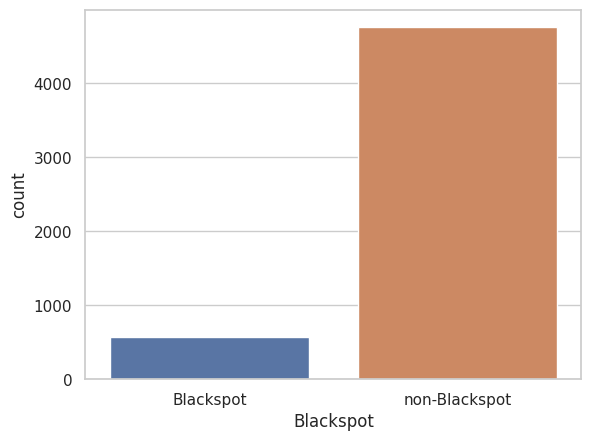

In [ ]:
#Using seaborn
sns.countplot(x=blackspot_data['Blackspot'])

(array([ 567.,    0.,    0.,    0.,    0.,    0.,    0.,    0.,    0.,
        4759.]),
 array([0. , 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1. ]),
 <BarContainer object of 10 artists>)

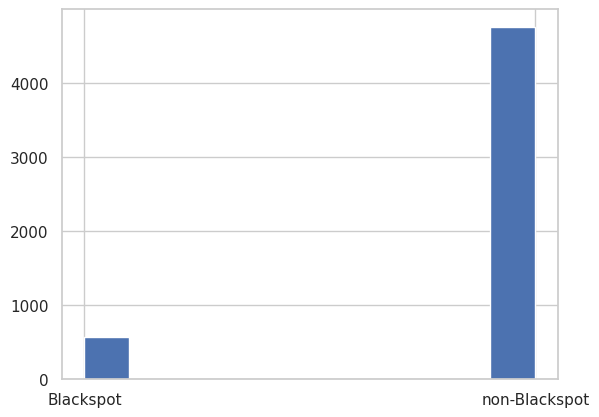

In [ ]:
#Using seaborn
plt.hist(blackspot_data['Blackspot'])

<Axes: xlabel='ROAD_TYPE', ylabel='count'>

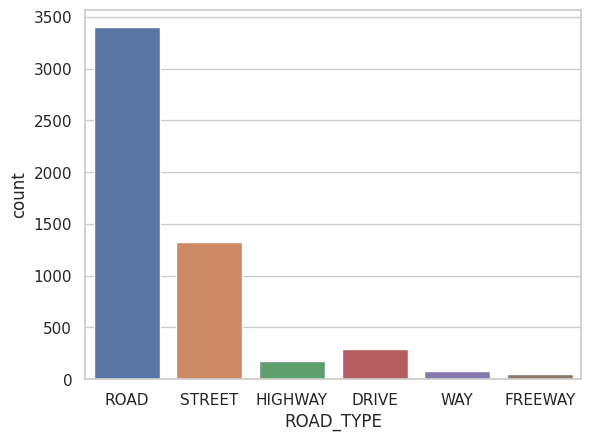

In [ ]:
#Using seaborn
sns.countplot(x=blackspot_data['ROAD_TYPE'])

(array([3400.,    0., 1324.,    0.,  180.,    0.,  295.,    0.,   77.,
          50.]),
 array([0. , 0.5, 1. , 1.5, 2. , 2.5, 3. , 3.5, 4. , 4.5, 5. ]),
 <BarContainer object of 10 artists>)

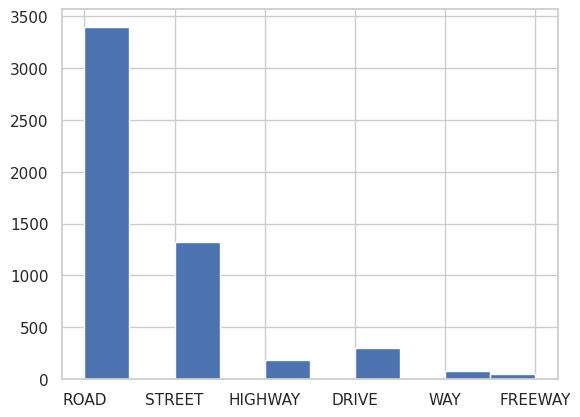

In [ ]:
#Using seaborn
plt.hist(blackspot_data['ROAD_TYPE'])

## Visualise other categorical variables

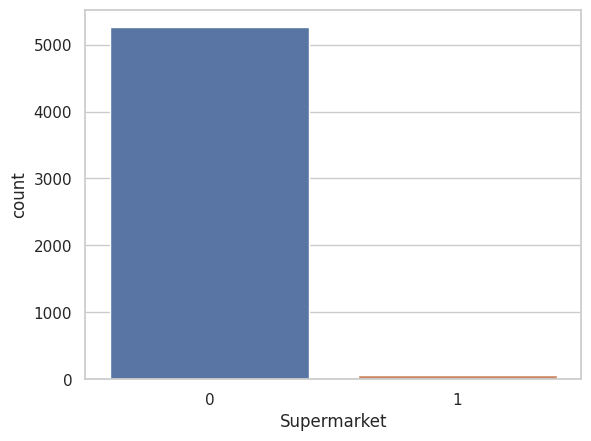

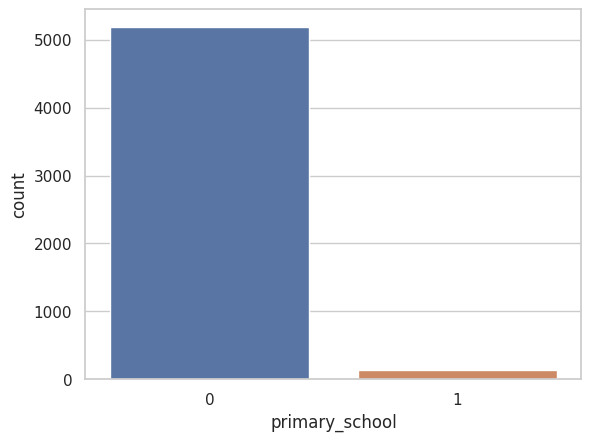

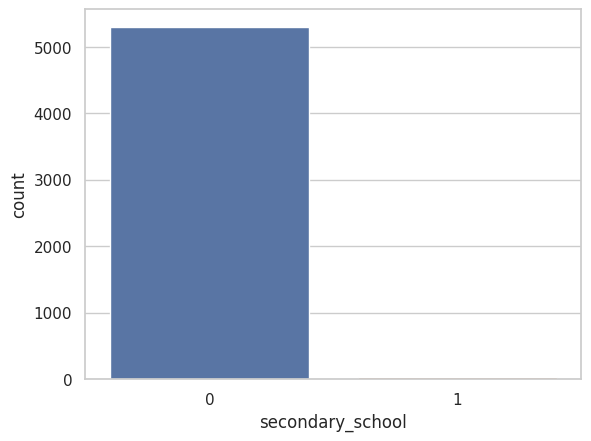

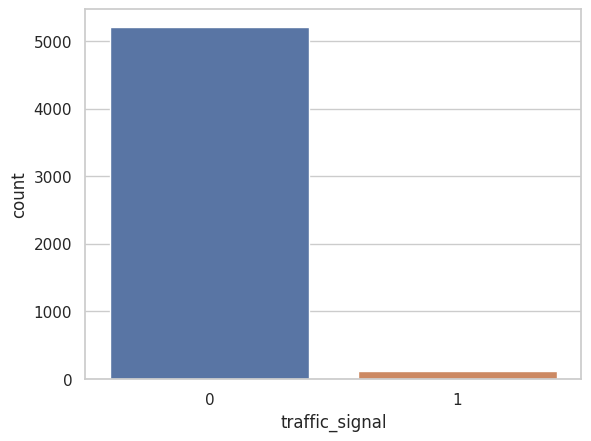

In [ ]:
for i in ['Supermarket','primary_school', 'secondary_school', 'traffic_signal']:
   plt.figure()
   sns.countplot(x=blackspot_data[i])

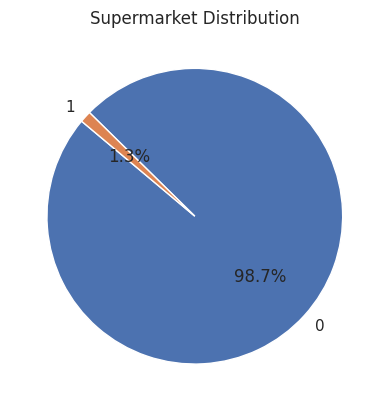

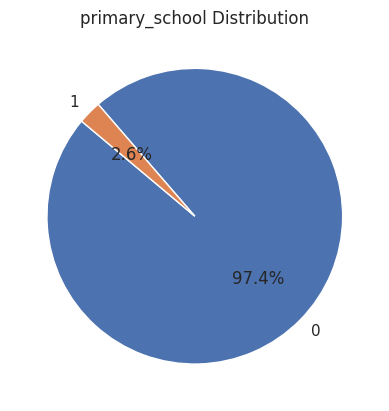

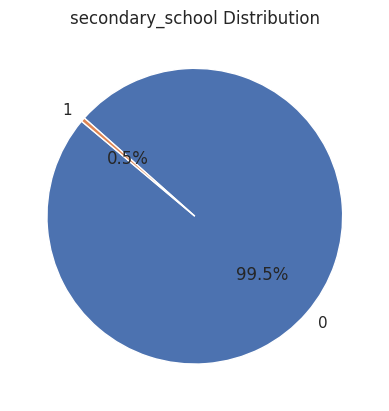

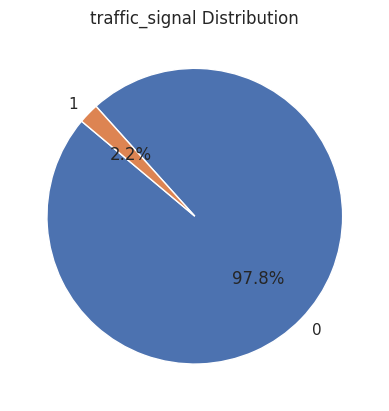

In [ ]:
for i in ['Supermarket','primary_school','secondary_school','traffic_signal']:
  plt.figure()
  counts = blackspot_data[i].value_counts()
  plt.pie(counts, labels= counts.index,autopct='%1.1f%%',startangle=140)
  plt.title(f'{i} Distribution')

You can use stats results to handle missing data

In [ ]:
#Fill in missing numerical data with mean and categorical data with mode
blackspot_data['AGE_65YRS_OVER_PCNT'].fillna(blackspot_data['AGE_65YRS_OVER_PCNT'].mean(),inplace=True)
blackspot_data['Lq_Licenses'].fillna(blackspot_data['Lq_Licenses'].mean(),inplace=True)

In [ ]:
print(blackspot_data.isnull().sum())

ID                                 0
EZI_ROAD_NAME                      0
ROAD_NAME                          0
ROAD_TYPE                          0
AGE_LESS_THAN_15YRS_PCNT           0
AGE_15_24YRS_PCNT                  0
AGE_25_44YRS_PCNT                  0
AGE_45_64YRS_PCNT                  0
AGE_18YRS_OVER_PCNT                0
AGE_65YRS_OVER_PCNT                0
SEO_PERSONS_PCNT                   0
FC_COUPLE_NO_CHILDREN_PCNT         0
FC_COUPLE_WITH_CHILDREN_PCNT       0
FC_SINGLE_PARENT                   0
CARS_ZERO_HH_PCNT                  0
CARS_ONE_HH_PCNT                   0
CARS_TWO_OR_MORE_HH_PCNT           0
DWELLING_SEP_HOUSE_PCNT            0
DWELLING_SEMID_RO_OR_TCE_H_TH_P    0
DWELLING_FLAT_UNIT_APART_PCNT      0
OCCUPATION_WHITE_COLLAR_PCNT       0
OCCUPATION_BLUE_COLLAR_PCNT        0
SEIFA                              0
Commercial%                        0
Industrial%                        0
Residential%                       0
Parkland%                          0
P

# Bivariate Analysis

##Display a countplot for one categorical variable grouped by a second categorical variable

In [ ]:
sns.countplot(data=blackspot_data, x='Blackspot', hue='Intersection')

<Axes: xlabel='Blackspot', ylabel='count'>

##Compare distributions of numerical variables using boxplots

In [ ]:
sns.boxplot(data=blackspot_data, y='Blackspot', x='AGE_18YRS_OVER_PCNT')

<Axes: xlabel='AGE_18YRS_OVER_PCNT', ylabel='Blackspot'>

<Axes: xlabel='AGE_18YRS_OVER_PCNT', ylabel='Blackspot'>

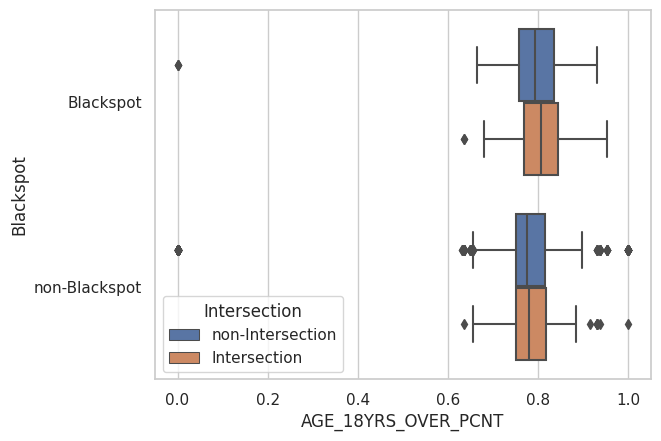

In [ ]:
sns.boxplot(data=blackspot_data, x="AGE_18YRS_OVER_PCNT", y="Blackspot", hue="Intersection")

<Axes: xlabel='AGE_18YRS_OVER_PCNT', ylabel='Density'>

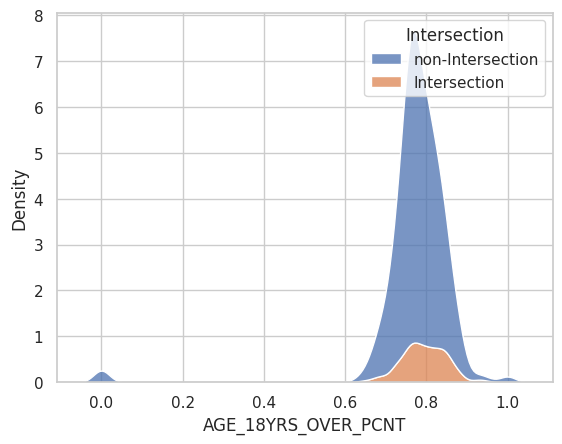

In [ ]:
#view Intersection distributions by Age above 18 years
sns.kdeplot(data=blackspot_data, x="AGE_18YRS_OVER_PCNT", hue="Intersection", multiple="stack")

##Ploting diagram to see relationships between two numerical variables

In [ ]:
sns.scatterplot(data=blackspot_data, x='AGE_65YRS_OVER_PCNT', y='ROAD_TYPE')

<Axes: xlabel='AGE_65YRS_OVER_PCNT', ylabel='ROAD_TYPE'>

# Data conversion

In [ ]:
from sklearn.preprocessing import LabelEncoder

encoder = LabelEncoder()

columns_to_encode = ['Blackspot','Intersection','ROAD_NAME']
for column in columns_to_encode:
    blackspot_data[column + '_N'] = encoder.fit_transform(blackspot_data[column])

In [ ]:
blackspot_data.tail(20)

ID               EZI_ROAD_NAME              ROAD_NAME ROAD_TYPE  \
5306  2067              FISCHER STREET                FISCHER    STREET   
5307  3668      TURNBULL-WOOLAMAI ROAD      TURNBULL-WOOLAMAI      ROAD   
5308  3308      KITTY MILLERS BAY ROAD      KITTY MILLERS BAY      ROAD   
5309   547               SYDNEY STREET                 SYDNEY    STREET   
5310  3349         PHILLIP ISLAND ROAD         PHILLIP ISLAND      ROAD   
5311  7349                GALATEA ROAD                GALATEA      ROAD   
5312  5669            NEERIM EAST ROAD            NEERIM EAST      ROAD   
5313  7649          STAUGHTON STREET E              STAUGHTON    STREET   
5314  1008               MORETONS ROAD               MORETONS      ROAD   
5315  7158                BASS HIGHWAY                   BASS   HIGHWAY   
5316  3819              TULLOCH STREET                TULLOCH    STREET   
5317  5020               ATTWOODS ROAD               ATTWOODS      ROAD   
5318  2878              MCHAFFIE DRIVE               MCHAFFIE     DRIVE   
5319  1428                 TOLSON ROAD                 TOLSON      ROAD   
5320  3404         SUNDERLAND BAY ROAD         SUNDERLAND BAY      ROAD   
5321   256  WARBURTON-WOODS POINT ROAD  WARBURTON-WOODS POINT      ROAD   
5322  5182             GLENELG HIGHWAY                GLENELG   HIGHWAY   
5323  4196          CAPE PATERSON ROAD          CAPE PATERSON      ROAD   
5324  4352                MCPHANS ROAD                MCPHANS      ROAD   
5325   223                 ROGERS ROAD                 ROGERS      ROAD   

      AGE_LESS_THAN_15YRS_PCNT  AGE_15_24YRS_PCNT  AGE_25_44YRS_PCNT  \
5306                     0.184              0.078              0.269   
5307                     0.183              0.062              0.154   
5308                     0.210              0.103              0.155   
5309                     0.145              0.100              0.184   
5310                     0.122              0.103              0.160   
5311                     0.156              0.126              0.233   
5312                     0.142              0.124              0.148   
5313                     0.191              0.080              0.206   
5314                     0.195              0.067              0.246   
5315                     0.185              0.056              0.147   
5316                     0.229              0.124              0.295   
5317                     0.221              0.114              0.225   
5318                     0.126              0.081              0.193   
5319                     0.191              0.094              0.249   
5320                     0.217              0.070              0.251   
5321                     0.152              0.088              0.199   
5322                     0.142              0.090              0.209   
5323                     0.164              0.107              0.171   
5324                     0.155              0.173              0.129   
5325                     0.198              0.129              0.200   

      AGE_45_64YRS_PCNT  AGE_18YRS_OVER_PCNT  AGE_65YRS_OVER_PCNT  ...  \
5306              0.296                0.796                0.172  ...   
5307              0.398                0.793                0.203  ...   
5308              0.352                0.721                0.179  ...   
5309              0.299                0.819                0.272  ...   
5310              0.365                0.878                0.250  ...   
5311              0.332                0.790                0.153  ...   
5312              0.352                0.806                0.234  ...   
5313              0.338                0.768                0.186  ...   
5314              0.354                0.754                0.138  ...   
5315              0.401                0.797                0.211  ...   
5316              0.248                0.729                0.105  ...   
5317              0.332        

# Multivariate analysis with Heatmaps

In [ ]:
blackspot_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5326 entries, 0 to 5325
Data columns (total 39 columns):
 #   Column                           Non-Null Count  Dtype  
---  ------                           --------------  -----  
 0   ID                               5326 non-null   int64  
 1   EZI_ROAD_NAME                    5326 non-null   object 
 2   ROAD_NAME                        5326 non-null   object 
 3   ROAD_TYPE                        5326 non-null   object 
 4   AGE_LESS_THAN_15YRS_PCNT         5326 non-null   float64
 5   AGE_15_24YRS_PCNT                5326 non-null   float64
 6   AGE_25_44YRS_PCNT                5326 non-null   float64
 7   AGE_45_64YRS_PCNT                5326 non-null   float64
 8   AGE_18YRS_OVER_PCNT              5326 non-null   float64
 9   AGE_65YRS_OVER_PCNT              5326 non-null   float64
 10  SEO_PERSONS_PCNT                 5326 non-null   float64
 11  FC_COUPLE_NO_CHILDREN_PCNT       5326 non-null   float64
 12  FC_COUPLE_WITH_CHILD

<ipython-input-53-22bc7253fb49>:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(blackspot_data.corr(), cmap="crest", square=True, annot=True, fmt=".1f")


<Axes: >

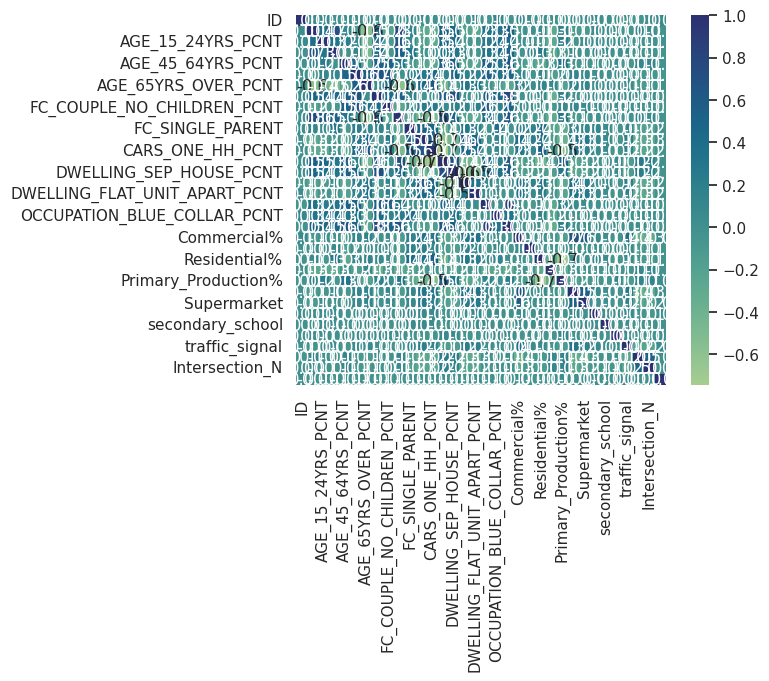

In [ ]:
sns.heatmap(blackspot_data.corr(), cmap="crest", square=True, annot=True, fmt=".1f")

<ipython-input-54-bf1d943edd68>:9: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  correlation_matrix = blackspot_data[columns_of_interest].corr()


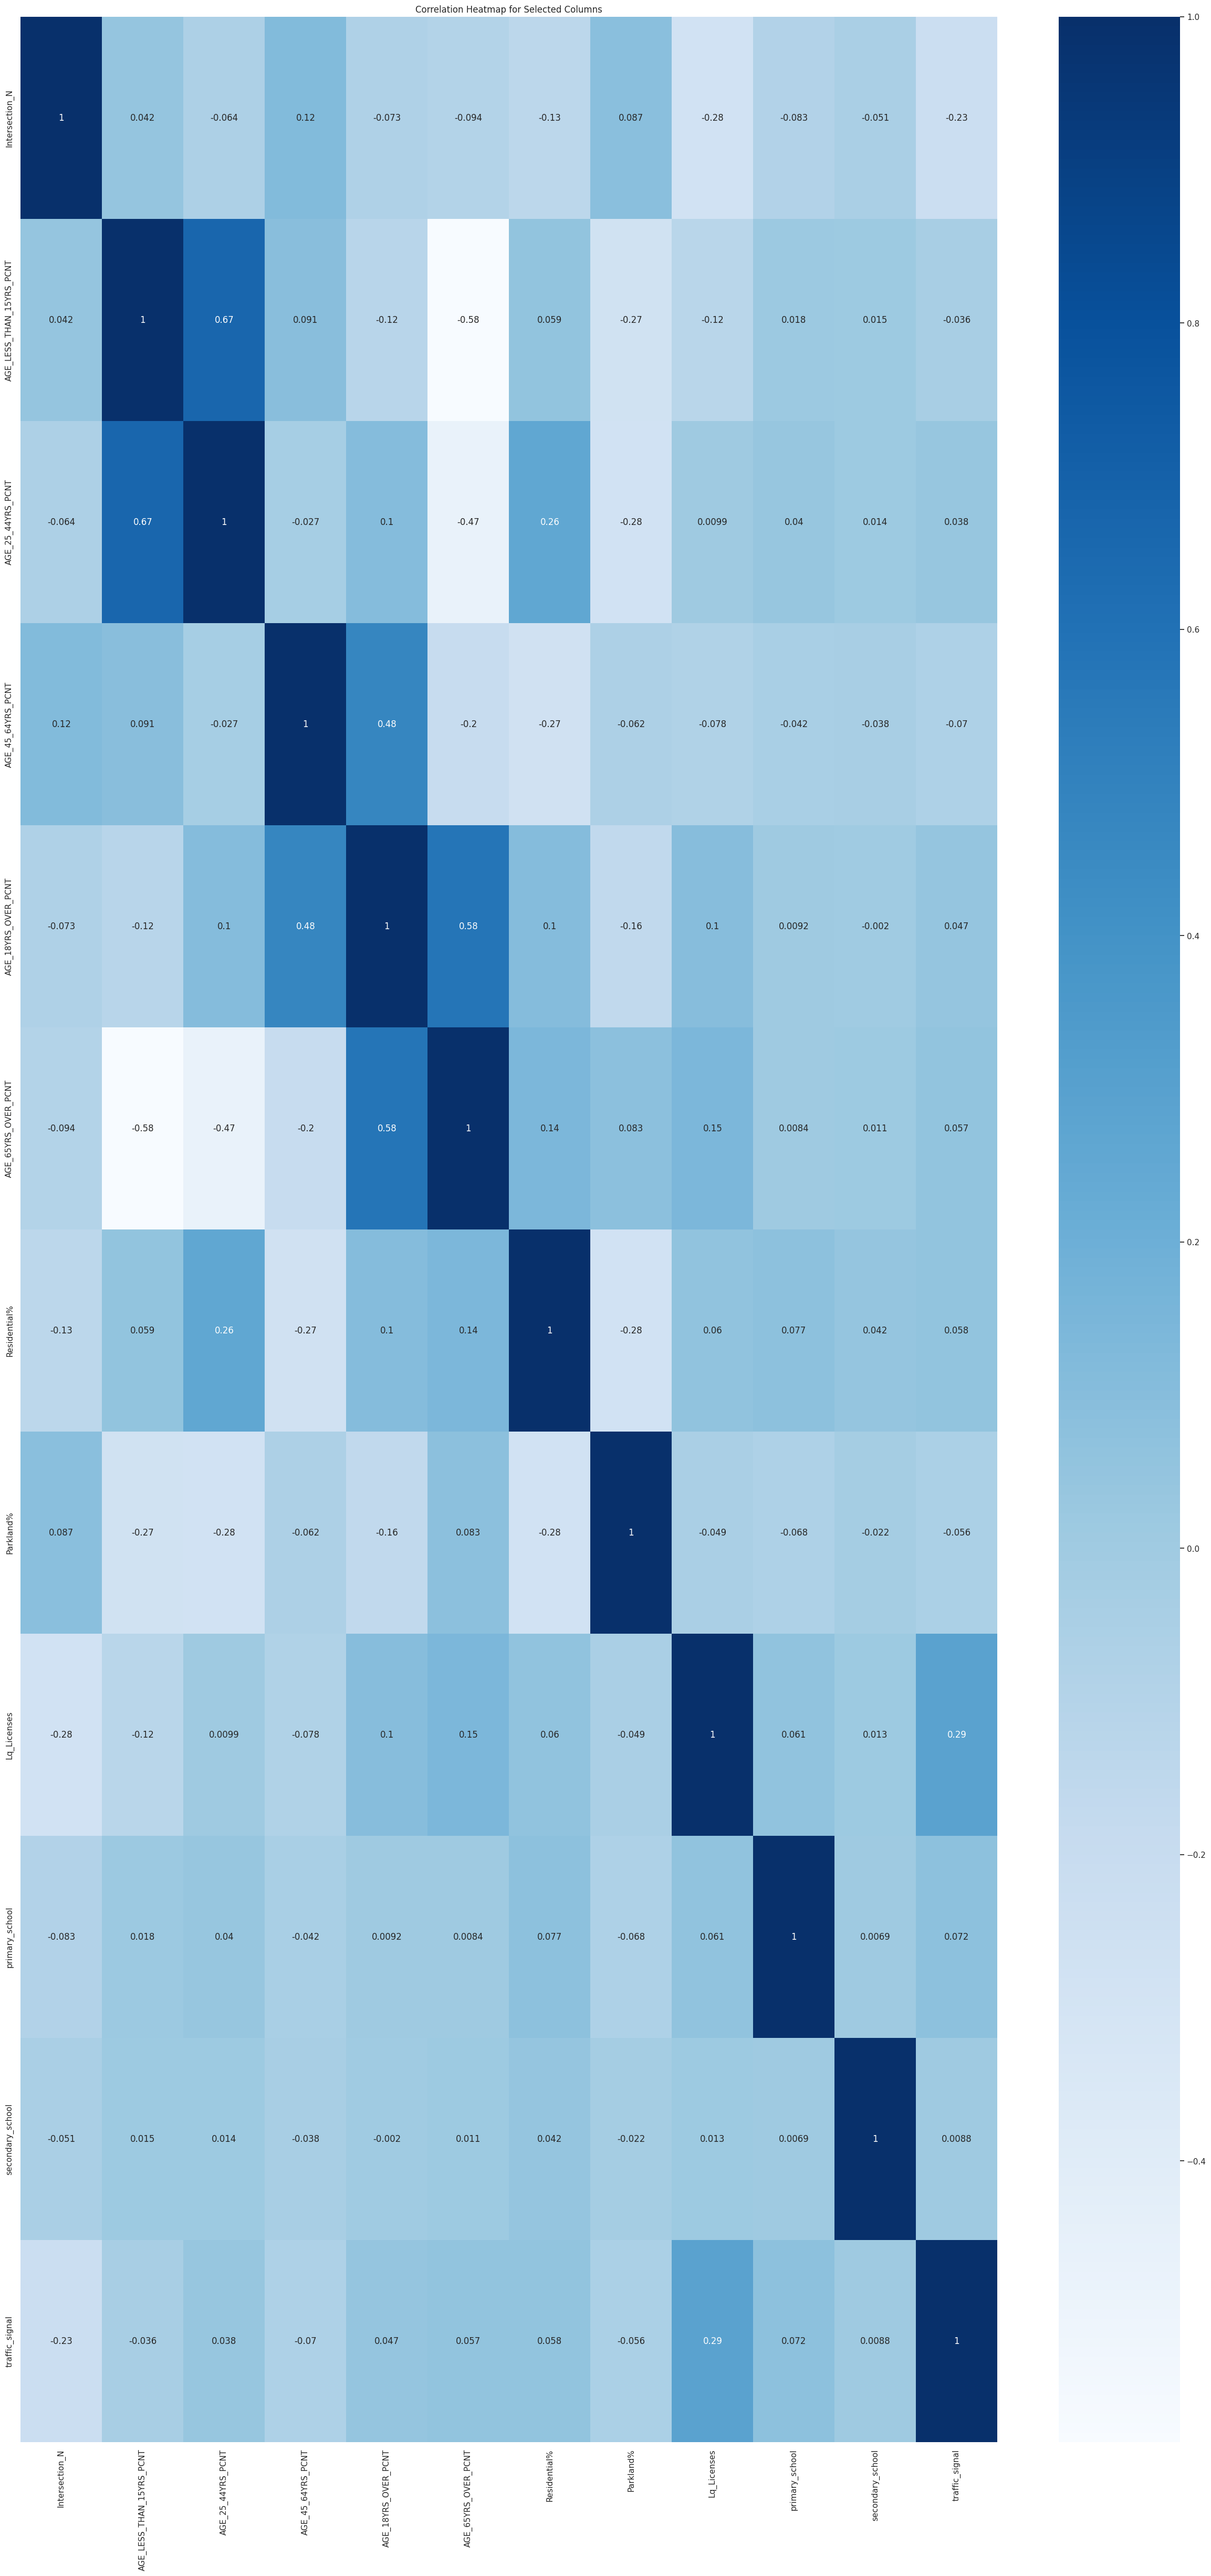

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt


# Select specific columns for correlation
columns_of_interest = ['Blackspot','Intersection','ROAD_NAME','Intersection_N','AGE_LESS_THAN_15YRS_PCNT','AGE_25_44YRS_PCNT','AGE_45_64YRS_PCNT','AGE_18YRS_OVER_PCNT','AGE_65YRS_OVER_PCNT','Residential%','Parkland%','Lq_Licenses','primary_school','secondary_school','traffic_signal']

# Calculate the correlation matrix for selected columns
correlation_matrix = blackspot_data[columns_of_interest].corr()

# Create a larger heatmap for the selected columns
plt.figure(figsize=(30,60))
sns.heatmap(data=correlation_matrix, cmap='Blues', annot=True)
plt.title('Correlation Heatmap for Selected Columns')
plt.show()
#sns.heatmap(records.corr(), cmap="crest", square=True, annot=True, fmt=".1f")

#Applying Model- 1 (Linear_Regression)

##Select Features

In [ ]:
#Select relevant predictors
features=['Intersection_N']
X=blackspot_data[features]

#Select the target variable for prediction
y=blackspot_data['Blackspot_N']

In [ ]:
X.shape

(5326, 1)

In [ ]:
y.shape

(5326,)

In [ ]:
#Import LabelEncoder
from sklearn.preprocessing import LabelEncoder

## ***Split the dataset:***

##Inspect the split datasets



In [ ]:
from sklearn.model_selection import train_test_split # Import train_test_split function

# Split dataset into training set 80% and test set 20%
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=2023)

#inspect the split datasets
print(X_train.head())
print(y_train.head())

print('Training dataset size:',X_train.shape)
print('Test dataset size:',X_test.shape)

      Intersection_N
3869               1
2104               0
5137               1
1641               1
1953               1
3869    1
2104    0
5137    1
1641    1
1953    0
Name: Blackspot_N, dtype: int64
Training dataset size: (4260, 1)
Test dataset size: (1066, 1)


## Training a Liner Regession Model

In [ ]:
#import linear_model
from sklearn import linear_model
#create a linear_model object
reg = linear_model.LinearRegression()

In [ ]:
# Train a Regression model (regressor) with the training dataset
reg=reg.fit(X_train,y_train)

#inspect the split datasets
print(X_train.head())
print(y_train.head())

print('Training dataset size:',X_train.shape)
print('Test dataset size:',X_test.shape)

      Intersection_N
3869               1
2104               0
5137               1
1641               1
1953               1
3869    1
2104    0
5137    1
1641    1
1953    0
Name: Blackspot_N, dtype: int64
Training dataset size: (4260, 1)
Test dataset size: (1066, 1)


In [ ]:
# Train a Regression model (regressor) with the training dataset
reg=reg.fit(X_train, y_train)

**Make predictions using the model and the test set**

In [ ]:
y_pred = reg.predict(X_test)

In [ ]:
plt.scatter(y_test, y_pred)
plt.xlabel("Blackspot")
plt.ylabel("Predicted Blackspot")
plt.title("Blackspot vs Predicted Blackspot")
plt.show()

In [ ]:
#set the formatting for floating numbers
pd.set_option('display.float_format', lambda x: '%.0f' % x)
Intersection_N=X_test['Intersection_N']

In [ ]:
#inspection
inspection=pd.DataFrame({'Actual':y_test, 'Predicted':y_pred})
inspection=pd.DataFrame({'Intersection_N':Intersection_N,'Actual':y_test, 'Predicted':y_pred})
inspection.head(20)

Intersection_N  Actual  Predicted
3578               1       1          1
16                 1       1          1
3466               0       1          0
1692               1       1          1
70                 1       1          1
1806               1       1          1
4598               1       1          1
994                0       1          0
640                0       0          0
2590               1       1          1
661                1       1          1
4162               1       1          1
668                1       1          1
474                1       1          1
2976               1       1          1
4861               1       1          1
576                1       1          1
219                1       1          1
893                1       1          1
829                0       0          0

**Getting the Intercept and Coefficients**

In [ ]:
print('%.2f' % reg.intercept_)
print('Coefficients:', ['%.2f' % coef for coef in reg.coef_])
print('Blackspot = %.2f + %.2f * Intersection' % (reg.intercept_, reg.coef_[0]))

0.49
Coefficients: ['0.46']
Blackspot = 0.49 + 0.46 * Intersection


<Axes: xlabel='Intersection_N', ylabel='Predicted'>

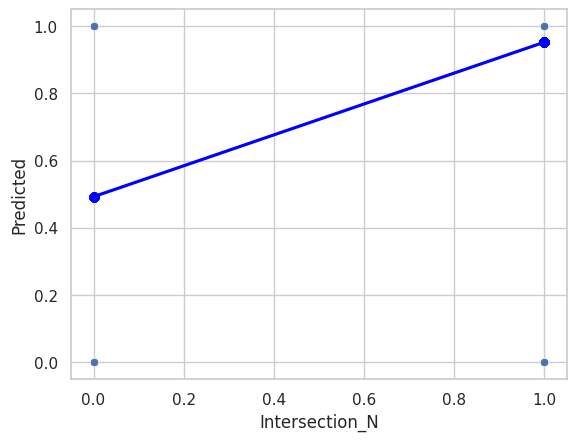

In [ ]:
sns.scatterplot(data=inspection, x='Intersection_N', y='Actual')
sns.regplot(data=inspection, x='Intersection_N', y='Predicted', color='blue')

##Performance Evaluation

In [ ]:
from sklearn.metrics import r2_score
r2 = r2_score(y_test, y_pred)
print(f"R-squared: {r2:.2f}")

R-squared: 0.32


In [ ]:
from sklearn.metrics import mean_absolute_error

# Calculate and print the mean absolute error
mae = mean_absolute_error(y_test, y_pred)
print(f"Mean Absolute Error: {mae:.0f}")

Mean Absolute Error: 0


In [ ]:
from sklearn.metrics import mean_squared_error

# Calculate and print the root mean square error
rmse = np.sqrt(mean_squared_error(y_test, y_pred))
print(f"Root Mean Square Error: {rmse:.0f}")

Root Mean Square Error: 0


In [ ]:
#Examine the performance using the descriptive stats of price
inspection['Actual'].describe()

count   1066
mean       1
std        0
min        0
25%        1
50%        1
75%        1
max        1
Name: Actual, dtype: float64

In [ ]:
#Examine the performance using the descriptive stats of predicted price
inspection['Predicted'].describe()

count   1066
mean       1
std        0
min        0
25%        1
50%        1
75%        1
max        1
Name: Predicted, dtype: float64

# Multi Linear Regression Model -2


Numerical Variables: ['ID', 'AGE_LESS_THAN_15YRS_PCNT', 'AGE_15_24YRS_PCNT', 'AGE_25_44YRS_PCNT', 'AGE_45_64YRS_PCNT', 'AGE_18YRS_OVER_PCNT', 'AGE_65YRS_OVER_PCNT', 'SEO_PERSONS_PCNT', 'FC_COUPLE_NO_CHILDREN_PCNT', 'FC_COUPLE_WITH_CHILDREN_PCNT', 'FC_SINGLE_PARENT', 'CARS_ZERO_HH_PCNT', 'CARS_ONE_HH_PCNT', 'CARS_TWO_OR_MORE_HH_PCNT', 'DWELLING_SEP_HOUSE_PCNT', 'DWELLING_SEMID_RO_OR_TCE_H_TH_P', 'DWELLING_FLAT_UNIT_APART_PCNT', 'OCCUPATION_WHITE_COLLAR_PCNT', 'OCCUPATION_BLUE_COLLAR_PCNT', 'SEIFA', 'Commercial%', 'Industrial%', 'Residential%', 'Parkland%', 'Primary_Production%', 'Lq_Licenses', 'Supermarket', 'primary_school', 'secondary_school', 'km_post', 'traffic_signal', 'Blackspot_N', 'Intersection_N', 'ROAD_NAME_N']


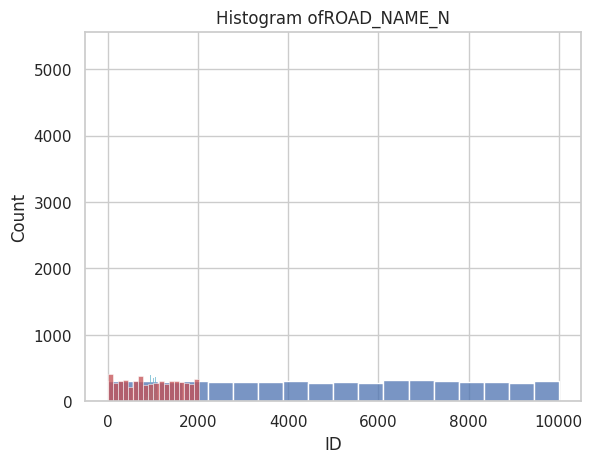

In [ ]:
#using seaborn https://seaborn.pydata.org/generated/seaborn.histplot.html
# Get the numerical variables from the dataset
numerical_variables = blackspot_data.select_dtypes(include=['int64', 'float64']).columns.tolist()

# Print the list of numerical variables
print("Numerical Variables:", numerical_variables)

## Display histograms using seaborn
for variable in numerical_variables:
    sns.histplot(data=blackspot_data, x=variable)
    plt.title(f"Histogram of{variable}")

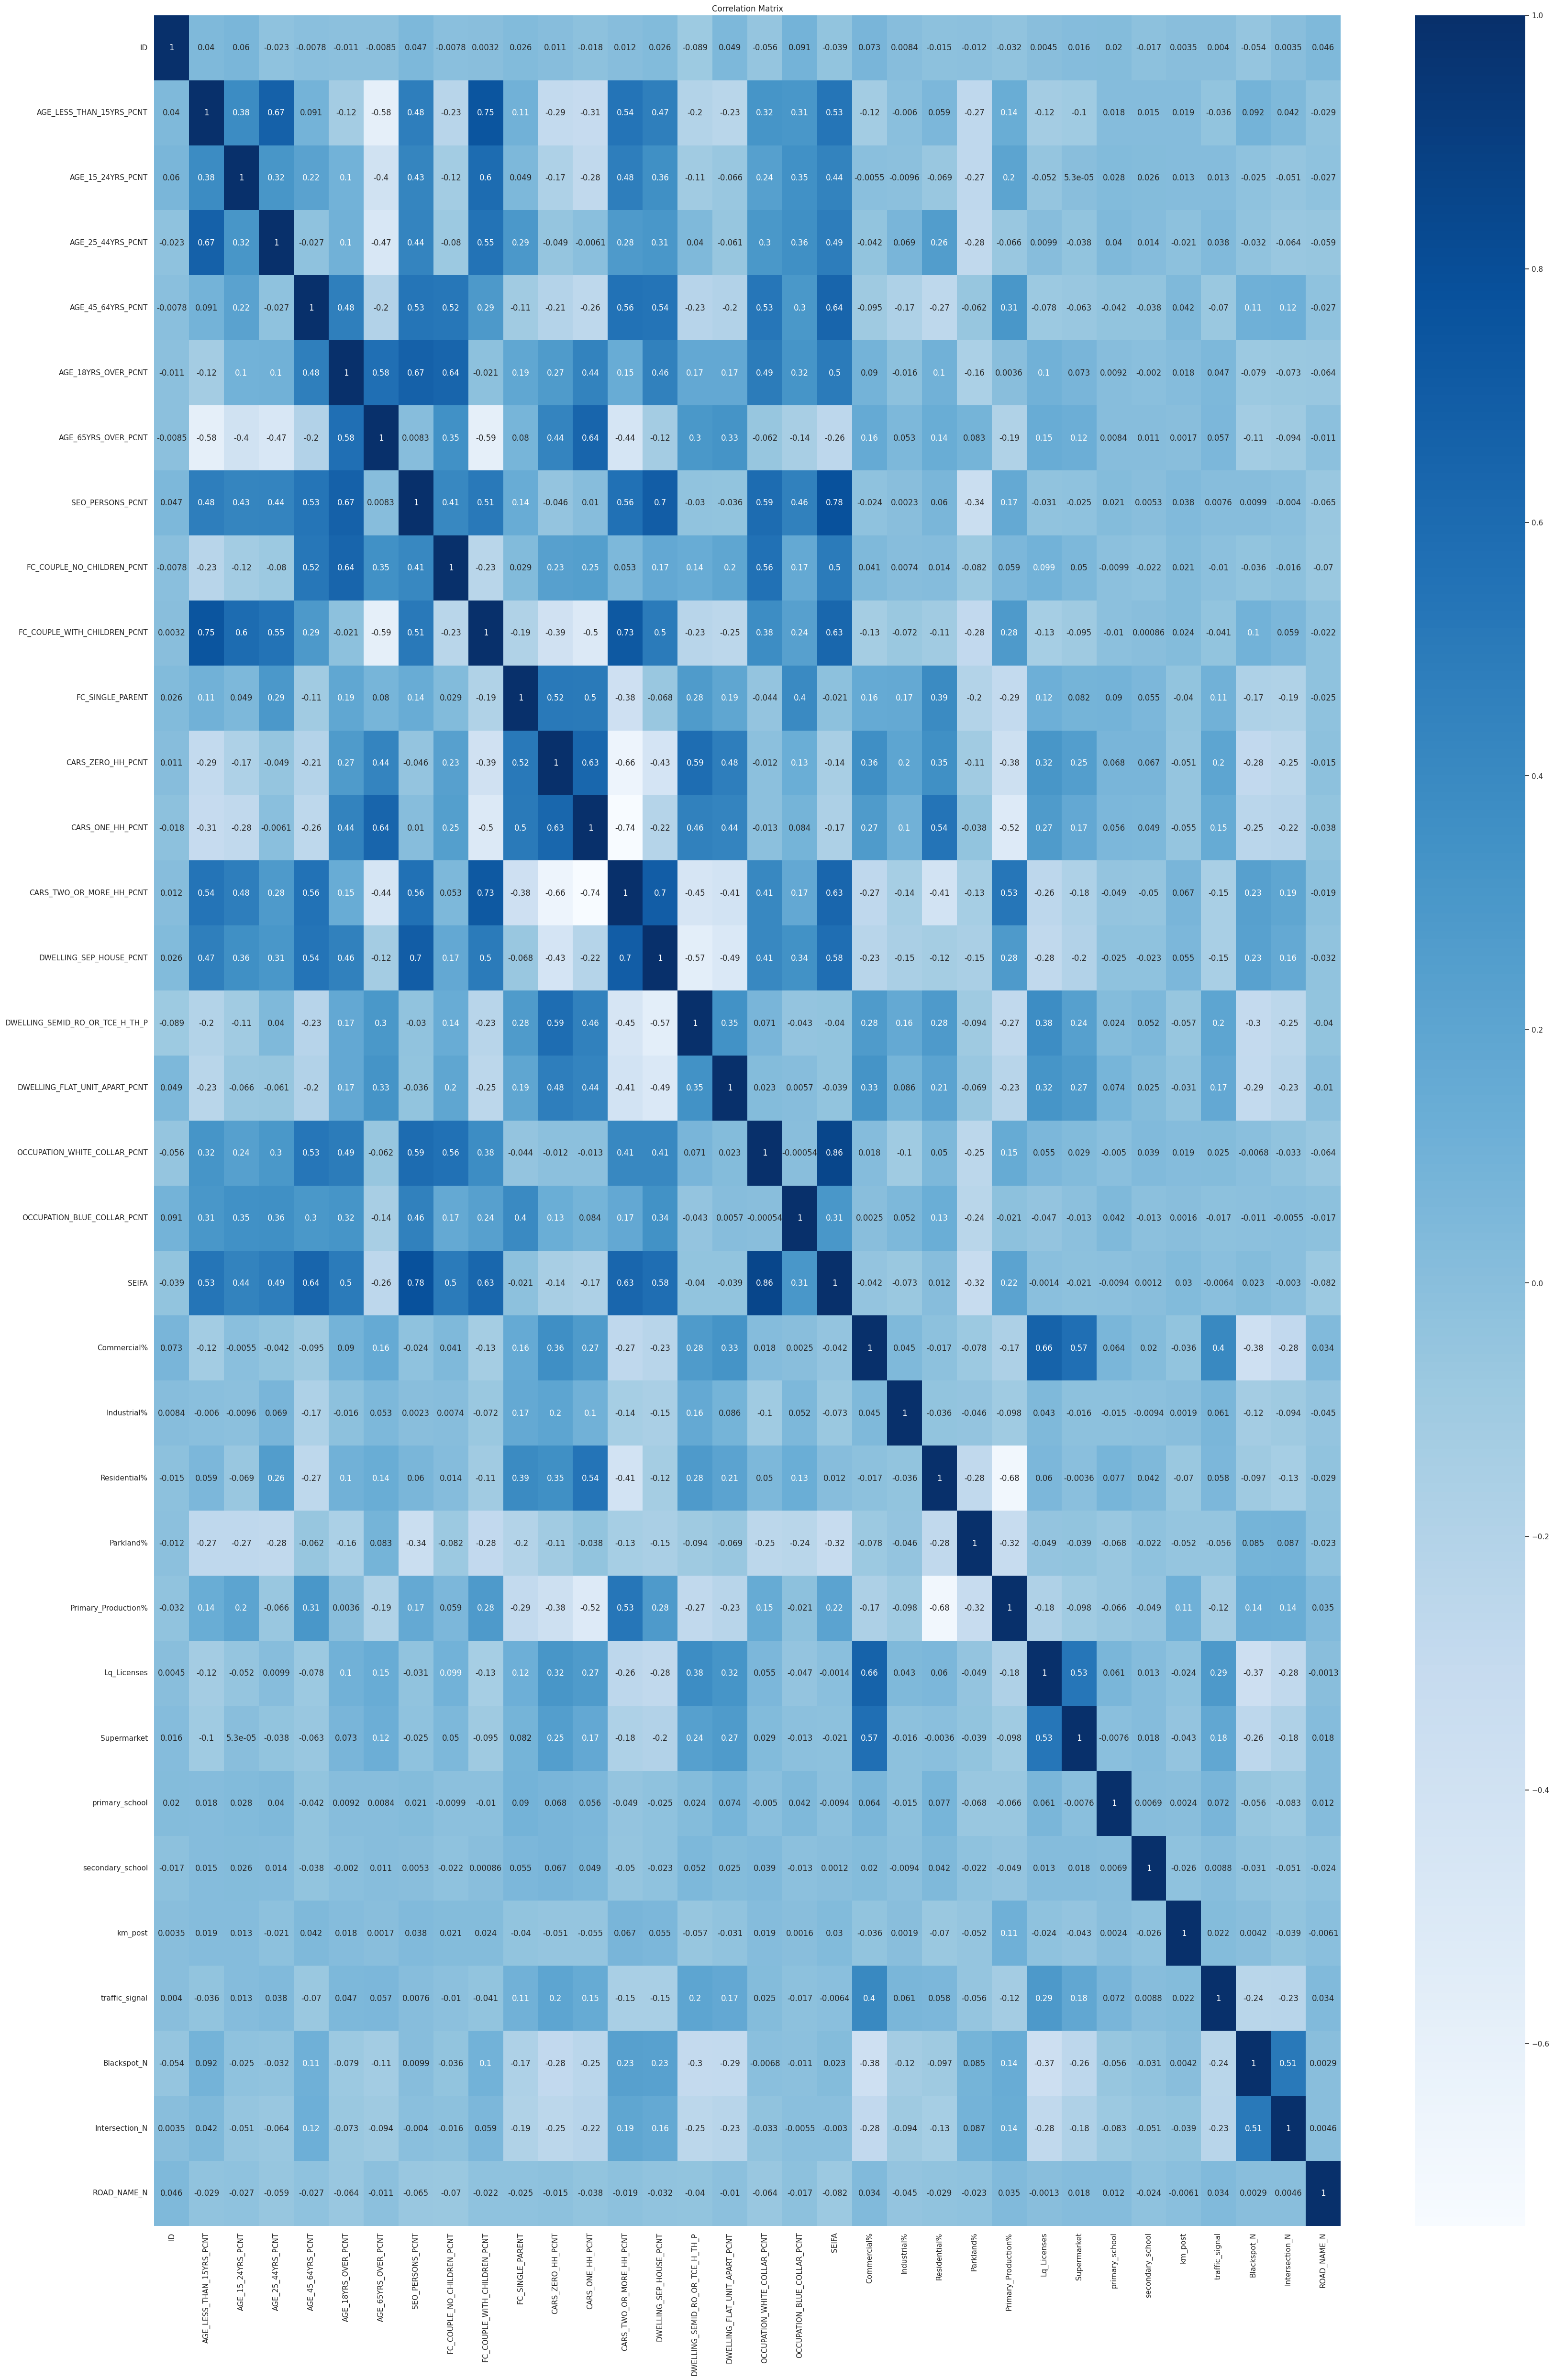

In [ ]:
plt.figure(figsize=(40,60))
sns.heatmap(blackspot_data[numerical_variables].corr(), annot=True, cmap='Blues')
plt.title("Correlation Matrix")
plt.show()

In [ ]:
blackspot_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5326 entries, 0 to 5325
Data columns (total 39 columns):
 #   Column                           Non-Null Count  Dtype  
---  ------                           --------------  -----  
 0   ID                               5326 non-null   int64  
 1   EZI_ROAD_NAME                    5326 non-null   object 
 2   ROAD_NAME                        5326 non-null   object 
 3   ROAD_TYPE                        5326 non-null   object 
 4   AGE_LESS_THAN_15YRS_PCNT         5326 non-null   float64
 5   AGE_15_24YRS_PCNT                5326 non-null   float64
 6   AGE_25_44YRS_PCNT                5326 non-null   float64
 7   AGE_45_64YRS_PCNT                5326 non-null   float64
 8   AGE_18YRS_OVER_PCNT              5326 non-null   float64
 9   AGE_65YRS_OVER_PCNT              5326 non-null   float64
 10  SEO_PERSONS_PCNT                 5326 non-null   float64
 11  FC_COUPLE_NO_CHILDREN_PCNT       5326 non-null   float64
 12  FC_COUPLE_WITH_CHILD

In [ ]:
#select relevant features and train and evaluate a model. For example
features=['DWELLING_SEP_HOUSE_PCNT','Intersection_N','CARS_TWO_OR_MORE_HH_PCNT','Parkland%','Primary_Production%','SEO_PERSONS_PCNT']
X=blackspot_data[features]

In [ ]:
#specify the label
y=blackspot_data['Blackspot_N']
y.head()

0    0
1    0
2    1
3    1
4    1
Name: Blackspot_N, dtype: int64

## Split data

In [ ]:
from sklearn.model_selection import train_test_split # Import train_test_split function
# Split dataset into training set 80% and test set 20%
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=2023)

#inspect the split datasets
print(X_train.head())
print(y_train.head())

print('Training dataset size:',X_train.shape)
print('Test dataset size:',X_test.shape)


      DWELLING_SEP_HOUSE_PCNT  Intersection_N  CARS_TWO_OR_MORE_HH_PCNT  \
3869                        1               1                         0   
2104                        1               0                         0   
5137                        1               1                         1   
1641                        1               1                         1   
1953                        1               1                         0   

      Parkland%  Primary_Production%  SEO_PERSONS_PCNT  
3869          0                    0                 1  
2104          0                    0                 1  
5137          0                    0                 1  
1641          0                    1                 1  
1953          0                    0                 1  
3869    1
2104    0
5137    1
1641    1
1953    0
Name: Blackspot_N, dtype: int64
Training dataset size: (4260, 6)
Test dataset size: (1066, 6)


## Train a linear model

In [ ]:
#create a linear_model object
reg =linear_model.LinearRegression()

In [ ]:
# Train a Regression model (regressor) with the training dataset
reg=reg.fit(X_train, y_train)

## Make predictions
Make predictions using the model and the test set

In [ ]:
#Make predictions for the test dataset
y_pred = reg.predict(X_test)

Inspect the predictions and the original labels

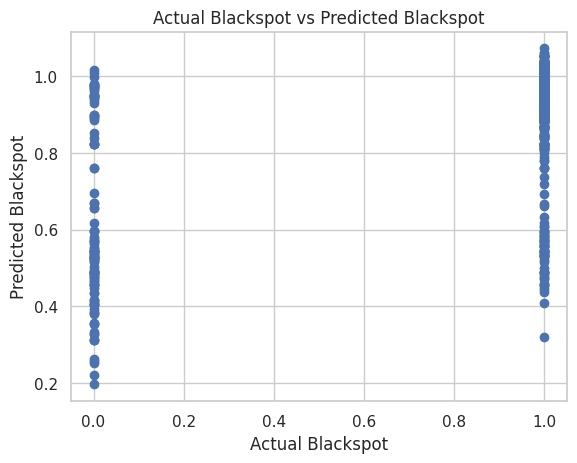

In [ ]:
plt.scatter(y_test, y_pred)
plt.xlabel("Actual Blackspot")
plt.ylabel("Predicted Blackspot")
plt.title("Actual Blackspot vs Predicted Blackspot")
plt.show()

In [ ]:
#set the formatting for floating numbers
pd.set_option('display.float_format', lambda x: '%.0f' % x)
Intersection_N=X_test['Intersection_N']
#inspection
inspection=pd.DataFrame({'Actual':y_test, 'Predicted':y_pred})
inspection=pd.DataFrame({'Intersection_N':Intersection_N, 'Actual':y_test, 'Predicted':y_pred})
inspection.head(20)

Intersection_N  Actual  Predicted
3578               1       1          1
16                 1       1          1
3466               0       1          1
1692               1       1          1
70                 1       1          1
1806               1       1          1
4598               1       1          1
994                0       1          1
640                0       0          0
2590               1       1          1
661                1       1          1
4162               1       1          1
668                1       1          1
474                1       1          1
2976               1       1          1
4861               1       1          1
576                1       1          1
219                1       1          1
893                1       1          1
829                0       0          1

In [ ]:
#set the formatting for floating numbers
pd.set_option('display.float_format', lambda x: '%.0f' % x)
CARS_TWO_OR_MORE_HH_PCNT=X_test['CARS_TWO_OR_MORE_HH_PCNT']
#inspection
inspection=pd.DataFrame({'Actual':y_test, 'Predicted':y_pred})
inspection=pd.DataFrame({'CARS_TWO_OR_MORE_HH_PCNT':CARS_TWO_OR_MORE_HH_PCNT, 'Actual':y_test, 'Predicted':y_pred})
inspection.head(20)

CARS_TWO_OR_MORE_HH_PCNT  Actual  Predicted
3578                         1       1          1
16                           1       1          1
3466                         1       1          1
1692                         1       1          1
70                           1       1          1
1806                         1       1          1
4598                         1       1          1
994                          1       1          1
640                          1       0          0
2590                         0       1          1
661                          1       1          1
4162                         1       1          1
668                          0       1          1
474                          1       1          1
2976                         1       1          1
4861                         1       1          1
576                          1       1          1
219                          1       1          1
893                          1       1          1
829                          1       0          1

## Performance evaluation

In [ ]:
from sklearn.metrics import r2_score
r2 = r2_score(y_test, y_pred)
print(f"R-squared: {r2:.2f}")

R-squared: 0.37


In [ ]:
from sklearn.metrics import mean_absolute_error

# Calculate and print the mean absolute error
mae = mean_absolute_error(y_test, y_pred)
print(f"Mean Absolute Error: {mae:.0f}")

Mean Absolute Error: 0


In [ ]:
from sklearn.metrics import mean_squared_error

# Calculate and print the root mean square error
rmse = np.sqrt(mean_squared_error(y_test, y_pred))
print(f"Root Mean Square Error: {rmse:.0f}")

Root Mean Square Error: 0


In [ ]:
#Examine the performance using the descriptive stats of price
inspection['Actual'].describe()

count   1066
mean       1
std        0
min        0
25%        1
50%        1
75%        1
max        1
Name: Actual, dtype: float64

In [ ]:
#Examine the performance using the descriptive stats of predicted price
inspection['Predicted'].describe()

count   1066
mean       1
std        0
min        0
25%        1
50%        1
75%        1
max        1
Name: Predicted, dtype: float64

In [ ]:
# Print the features and their coefficients
for feature, coef in zip(features, reg.coef_):
    print(f'{feature}: {coef:.2f}')

DWELLING_SEP_HOUSE_PCNT: 0.44
Intersection_N: 0.41
CARS_TWO_OR_MORE_HH_PCNT: 0.18
Parkland%: 0.03
Primary_Production%: 0.00
SEO_PERSONS_PCNT: -0.52


In [ ]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

In [ ]:
# Add a constant "intercept" to the predictors and calculate VIF
X_vif = X.copy()
X_vif['intercept'] = 1

vif = pd.DataFrame()
vif["variables"] = X_vif.columns
vif["VIF"] = [variance_inflation_factor(X_vif.values, i) for i in range(X_vif.shape[1])]

# Print VIFs to two decimal places
for index, row in vif.iterrows():
    print(f'{row["variables"]}: {row["VIF"]:.2f}')

DWELLING_SEP_HOUSE_PCNT: 2.73
Intersection_N: 1.09
CARS_TWO_OR_MORE_HH_PCNT: 2.75
Parkland%: 1.36
Primary_Production%: 1.69
SEO_PERSONS_PCNT: 2.45
intercept: 92.16


In [ ]:
from sklearn.linear_model import Lasso

# Create a Lasso model
lasso = Lasso(alpha=1.0)

# Fit the model using the training data
lasso.fit(X_train, y_train)

# Get the coefficients
coefficients = lasso.coef_

# Print the features and their coefficients
for feature, coef in zip(features, coefficients):
    print(f'{feature}: {coef}')

DWELLING_SEP_HOUSE_PCNT: 0.0
Intersection_N: 0.0
CARS_TWO_OR_MORE_HH_PCNT: 0.0
Parkland%: 0.0
Primary_Production%: 0.0
SEO_PERSONS_PCNT: 0.0


IMPORT LIBRARIES

In [ ]:
import numpy as np
import pandas as pd
import os
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import PolynomialFeatures
from sklearn.metrics import r2_score,mean_squared_error, mean_absolute_error

In [ ]:
print(blackspot_data.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5326 entries, 0 to 5325
Data columns (total 39 columns):
 #   Column                           Non-Null Count  Dtype  
---  ------                           --------------  -----  
 0   ID                               5326 non-null   int64  
 1   EZI_ROAD_NAME                    5326 non-null   object 
 2   ROAD_NAME                        5326 non-null   object 
 3   ROAD_TYPE                        5326 non-null   object 
 4   AGE_LESS_THAN_15YRS_PCNT         5326 non-null   float64
 5   AGE_15_24YRS_PCNT                5326 non-null   float64
 6   AGE_25_44YRS_PCNT                5326 non-null   float64
 7   AGE_45_64YRS_PCNT                5326 non-null   float64
 8   AGE_18YRS_OVER_PCNT              5326 non-null   float64
 9   AGE_65YRS_OVER_PCNT              5326 non-null   float64
 10  SEO_PERSONS_PCNT                 5326 non-null   float64
 11  FC_COUPLE_NO_CHILDREN_PCNT       5326 non-null   float64
 12  FC_COUPLE_WITH_CHILD

##Changing Text from string to float

How to deal with categorical features?

In [ ]:
# How to deal with categorical features?

from sklearn.preprocessing import LabelEncoder
#EZI_ROAD_NAME
le = LabelEncoder()
le.fit(blackspot_data.EZI_ROAD_NAME.drop_duplicates())
blackspot_data.EZI_ROAD_NAME = le.transform(blackspot_data.EZI_ROAD_NAME)
# ROAD_NAME
le.fit(blackspot_data.ROAD_NAME.drop_duplicates())
blackspot_data.ROAD_NAME = le.transform(blackspot_data.ROAD_NAME)
#ROAD_TYPE
le.fit(blackspot_data.ROAD_TYPE.drop_duplicates())
blackspot_data.ROAD_TYPE = le.transform(blackspot_data.ROAD_TYPE)
#Intersection
le.fit(blackspot_data.Intersection.drop_duplicates())
blackspot_data.Intersection = le.transform(blackspot_data.Intersection)
#Blackspot
le.fit(blackspot_data.Blackspot.drop_duplicates())
blackspot_data.Blackspot = le.transform(blackspot_data.Blackspot)


# Data preparation
1. Prepare X, y

2. Prepare X_train, X_test, y_train, y_test (hint: using `train_test_split')

In [ ]:
X = blackspot_data.drop(['Blackspot'], axis = 1)
y = blackspot_data.Blackspot

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state = 0)

# Model implementation


In [ ]:
lr = LinearRegression().fit(X_train,y_train)

y_train_pred = lr.predict(X_train)
y_test_pred = lr.predict(X_test)

print('MSE_Train: {}, MSE_Test: {}, MAE_Train: {}, MAE_Test: {}'.format(mean_squared_error(y_train, y_train_pred),
                                                      mean_squared_error(y_test, y_test_pred),
                                                      mean_absolute_error(y_train, y_train_pred),
                                                      mean_absolute_error(y_test, y_test_pred)))

print('R2 train data: %.3f, R2 test data: %.3f' % (
r2_score(y_train,y_train_pred),
r2_score(y_test,y_test_pred)))

MSE_Train: 7.708177373443487e-29, MSE_Test: 7.002431390152008e-29, MAE_Train: 5.157695466655373e-15, MAE_Test: 5.173169394111583e-15
R2 train data: 1.000, R2 test data: 1.000


##Residual Analysis

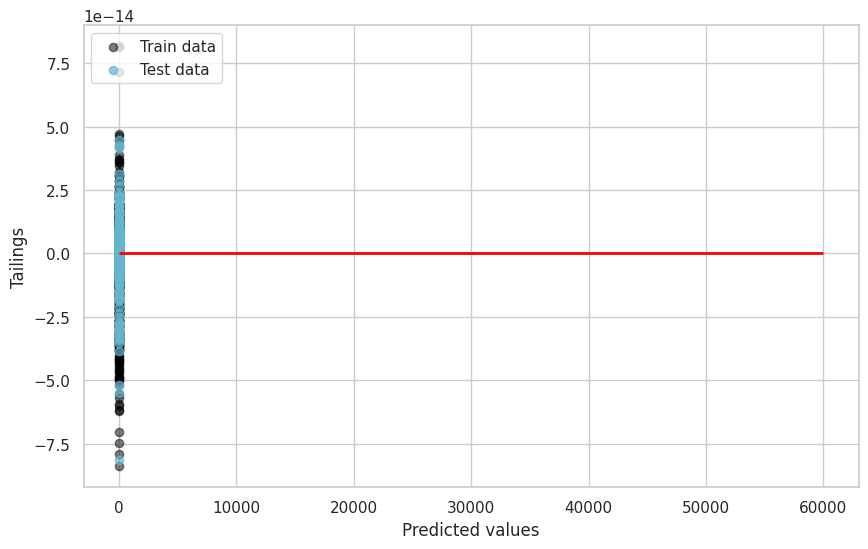

In [ ]:
plt.figure(figsize=(10,6))

plt.scatter(y_train_pred, y_train_pred - y_train,
          c = 'black', marker = 'o', s = 35, alpha = 0.5,
          label = 'Train data')
plt.scatter(y_test_pred, y_test_pred - y_test,
          c = 'c', marker = 'o', s = 35, alpha = 0.7,
          label = 'Test data')
plt.xlabel('Predicted values')
plt.ylabel('Tailings')
plt.legend(loc = 'upper left')
plt.hlines(y = 0, xmin = 0, xmax = 60000, lw = 2, color = 'red')
plt.show()

In [ ]:
quad = PolynomialFeatures(degree = 2)
X_quad = quad.fit_transform(X)

X_train, X_test, y_train, y_test = train_test_split(X_quad, y, test_size=0.2, random_state = 0)

plr = LinearRegression().fit(X_train, y_train)

y_train_pred = plr.predict(X_train)
y_test_pred = plr.predict(X_test)

print('MSE_Train: {}, MSE_Test: {}, MAE_Train: {}, MAE_Test: {}'.format(mean_squared_error(y_train, y_train_pred),
                                      mean_squared_error(y_test, y_test_pred),
                                      mean_absolute_error(y_train, y_train_pred),
                                      mean_absolute_error(y_test, y_test_pred)))

print('R2 train data: %.3f, R2 test data: %.3f' % (
r2_score(y_train,y_train_pred),
r2_score(y_test,y_test_pred)))

MSE_Train: 2.3778294472099514e-16, MSE_Test: 6.0312279453433e-16, MAE_Train: 1.0859145988139254e-08, MAE_Test: 1.3460008080985826e-08
R2 train data: 1.000, R2 test data: 1.000


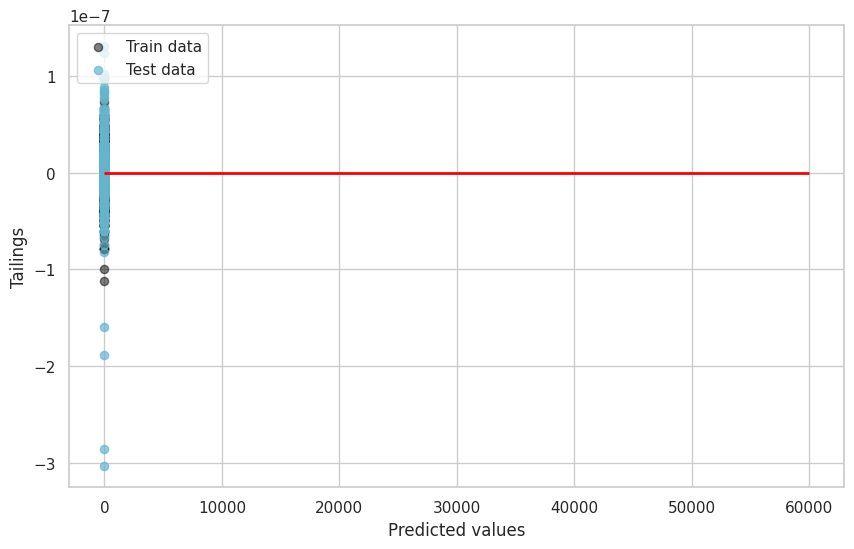

In [ ]:
plt.figure(figsize=(10,6))

plt.scatter(y_train_pred, y_train_pred - y_train,
          c = 'black', marker = 'o', s = 35, alpha = 0.5,
          label = 'Train data')
plt.scatter(y_test_pred, y_test_pred - y_test,
          c = 'c', marker = 'o', s = 35, alpha = 0.7,
          label = 'Test data')
plt.xlabel('Predicted values')
plt.ylabel('Tailings')
plt.legend(loc = 'upper left')
plt.hlines(y = 0, xmin = 0, xmax = 60000, lw = 2, color = 'red')
plt.show()

# Logistic Regression (Model -3 )
# Examine the distribution for the target

<Axes: xlabel='Blackspot', ylabel='count'>

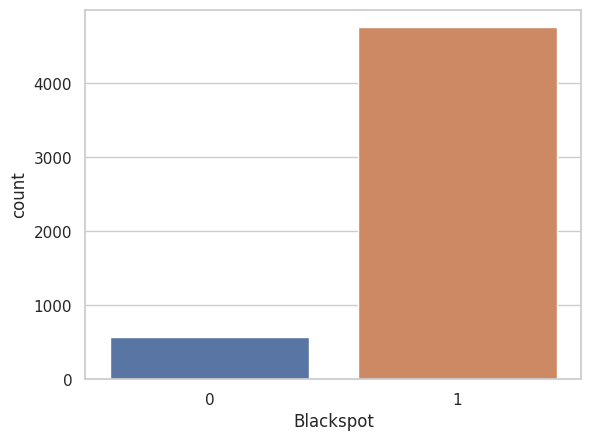

In [ ]:
#create barchats
sns.countplot(data=blackspot_data, x='Blackspot')

In [ ]:
#Interprete the result
blackspot_data['Blackspot'].value_counts()

1    4759
0     567
Name: Blackspot, dtype: int64

In [ ]:
#Interprete the result
blackspot_data['Blackspot'].value_counts(normalize=True).round(4)

1   1
0   0
Name: Blackspot, dtype: float64

In [ ]:
#Interpreate the outcome of the following code
blackspot_data['Blackspot'].describe()

count   5326
mean       1
std        0
min        0
25%        1
50%        1
75%        1
max        1
Name: Blackspot, dtype: float64

In [ ]:
#Interpret the outcome of the following code
blackspot_data.iloc[0:5].describe()

ID  EZI_ROAD_NAME  ROAD_NAME  ROAD_TYPE  AGE_LESS_THAN_15YRS_PCNT  \
count    5              5          5          5                         5   
mean  2779            853        793          3                         0   
std   3638            717        663          0                         0   
min     89             75         69          3                         0   
25%    576            611        570          3                         0   
50%    758            775        725          3                         0   
75%   3699            776        726          3                         0   
max   8773           2029       1877          4                         0   

       AGE_15_24YRS_PCNT  AGE_25_44YRS_PCNT  AGE_45_64YRS_PCNT  \
count                  5                  5                  5   
mean                   0                  0                  0   
std                    0                  0                  0   
min                    0                  0                  0   
25%                    0                  0                  0   
50%                    0                  0                  0   
75%                    0                  0                  0   
max                    0                  0                  0   

       AGE_18YRS_OVER_PCNT  AGE_65YRS_OVER_PCNT  ...  Intersection  \
count                    5                    5  ...             5   
mean                     1                    0  ...             1   
std                      0                    0  ...             0   
min                      1                    0  ...             0   
25%                      1                    0  ...             1   
50%                      1                    0  ...             1   
75%                      1                    0  ...             1   
max                      1                    0  ...             1   

       Supermarket  primary_school  secondary_school  km_post  traffic_signal  \
count            5               5                 5        5               5   
mean             0               0                 0        0               0   
std              0               0                 0        0               0   
min              0               0                 0        0               0   
25%              0               0                 0        0               0   
50%              0               0                 0        0               0   
75%              0               0                 0        0               0   
max              0               0                 0        1               0   

       Blackspot  Blackspot_N  Intersection_N  ROAD_NAME_N  
count          5            5               5            5  
mean           1            1               1          793  
std            1            1               0          663  
min            0            0               0           69  
25%            0            0               1          570  
50%            1            1               1          725  
75%            1            1               1          726  
max            1            1               1         1877  

[8 rows x 39 columns]

In [ ]:
#Interpret the outcome of the following code
blackspot_data.iloc[0:5].describe()

ID  EZI_ROAD_NAME  ROAD_NAME  ROAD_TYPE  AGE_LESS_THAN_15YRS_PCNT  \
count    5              5          5          5                         5   
mean  2779            853        793          3                         0   
std   3638            717        663          0                         0   
min     89             75         69          3                         0   
25%    576            611        570          3                         0   
50%    758            775        725          3                         0   
75%   3699            776        726          3                         0   
max   8773           2029       1877          4                         0   

       AGE_15_24YRS_PCNT  AGE_25_44YRS_PCNT  AGE_45_64YRS_PCNT  \
count                  5                  5                  5   
mean                   0                  0                  0   
std                    0                  0                  0   
min                    0                  0                  0   
25%                    0                  0                  0   
50%                    0                  0                  0   
75%                    0                  0                  0   
max                    0                  0                  0   

       AGE_18YRS_OVER_PCNT  AGE_65YRS_OVER_PCNT  ...  Intersection  \
count                    5                    5  ...             5   
mean                     1                    0  ...             1   
std                      0                    0  ...             0   
min                      1                    0  ...             0   
25%                      1                    0  ...             1   
50%                      1                    0  ...             1   
75%                      1                    0  ...             1   
max                      1                    0  ...             1   

       Supermarket  primary_school  secondary_school  km_post  traffic_signal  \
count            5               5                 5        5               5   
mean             0               0                 0        0               0   
std              0               0                 0        0               0   
min              0               0                 0        0               0   
25%              0               0                 0        0               0   
50%              0               0                 0        0               0   
75%              0               0                 0        0               0   
max              0               0                 0        1               0   

       Blackspot  Blackspot_N  Intersection_N  ROAD_NAME_N  
count          5            5               5            5  
mean           1            1               1          793  
std            1            1               0          663  
min            0            0               0           69  
25%            0            0               1          570  
50%            1            1               1          725  
75%            1            1               1          726  
max            1            1               1         1877  

[8 rows x 39 columns]

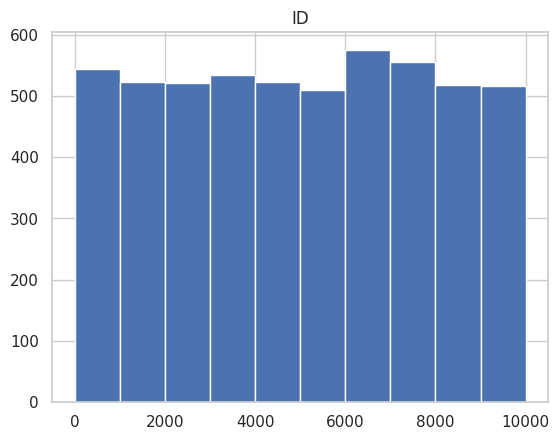

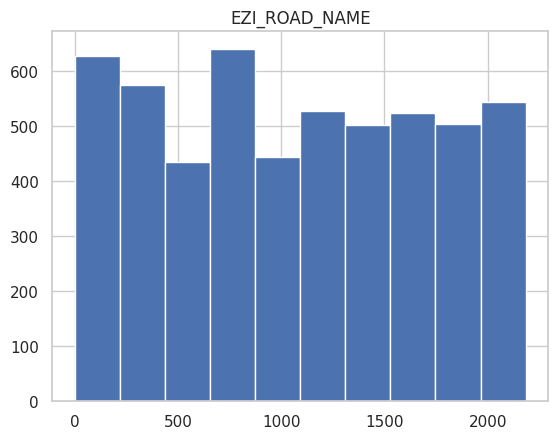

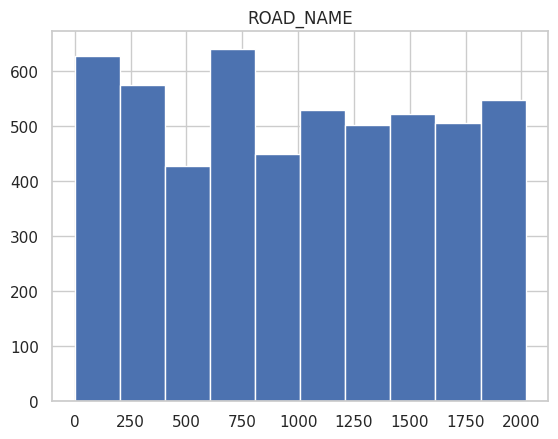

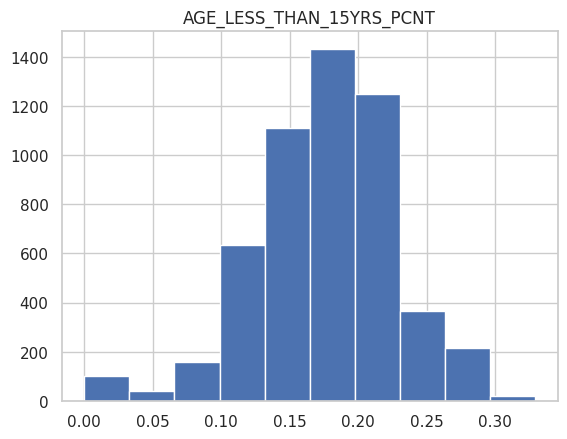

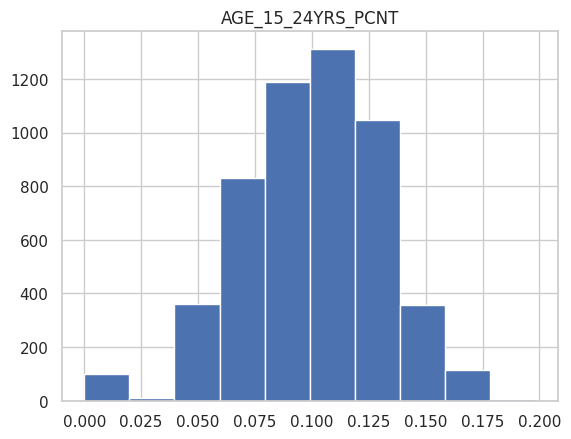

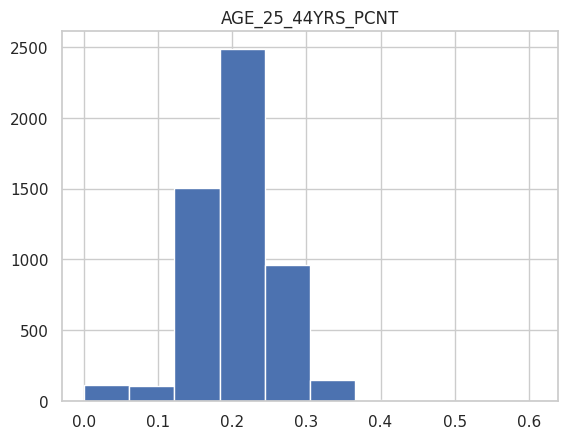

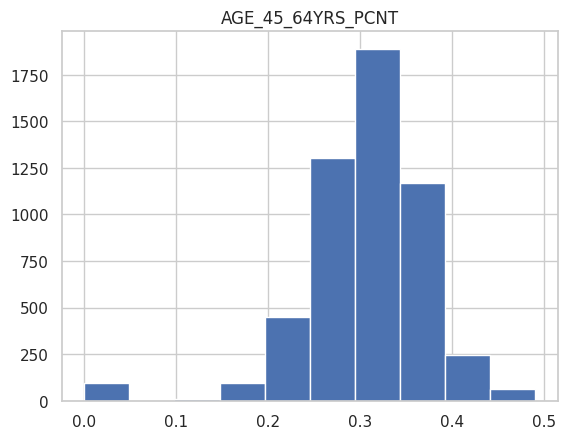

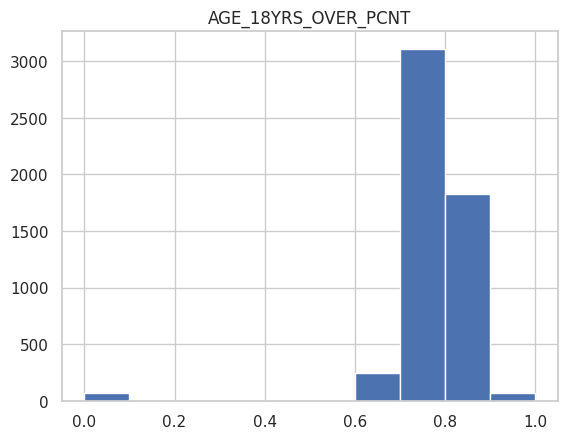

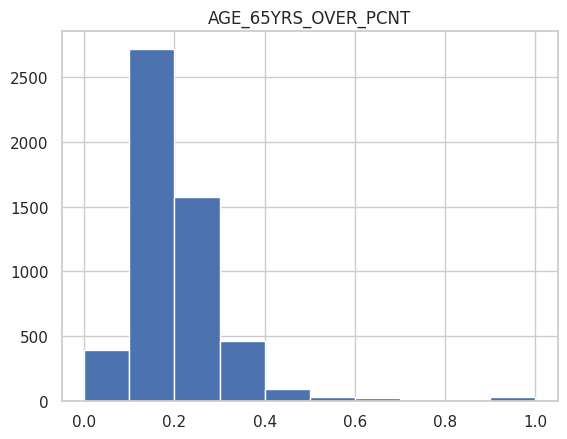

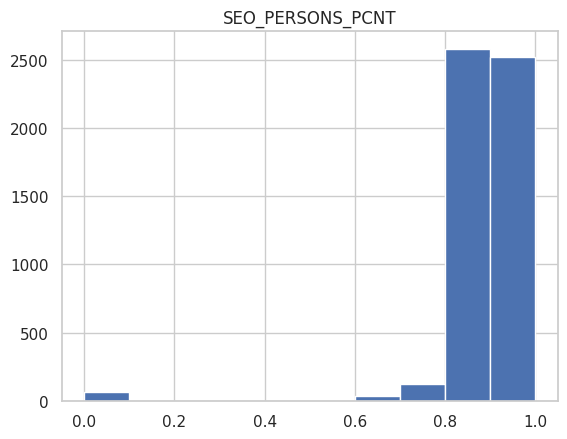

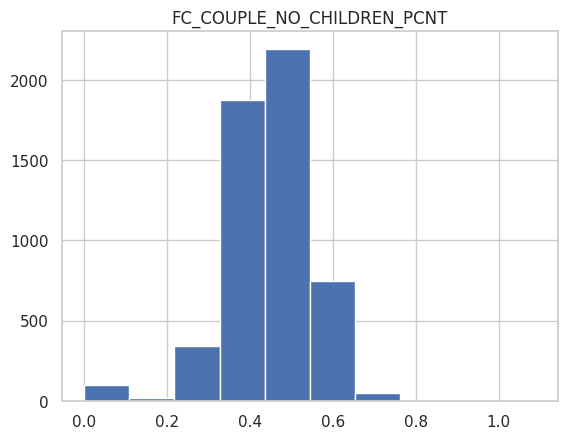

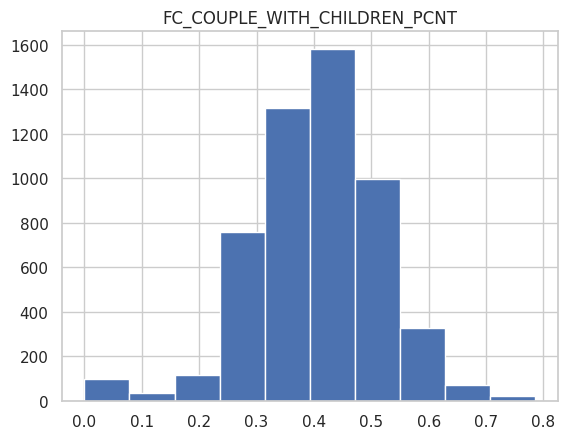

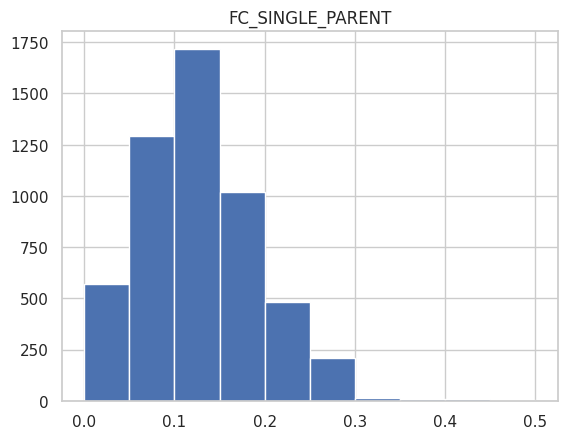

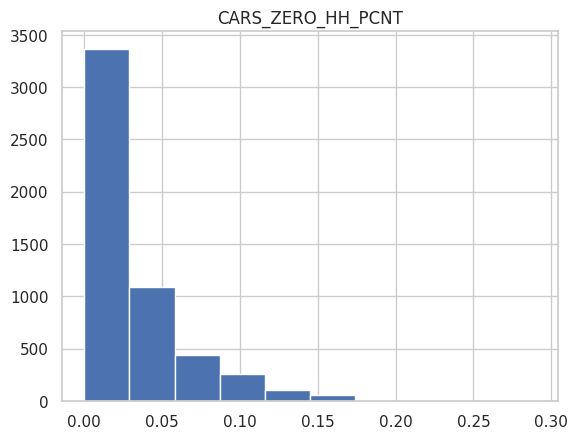

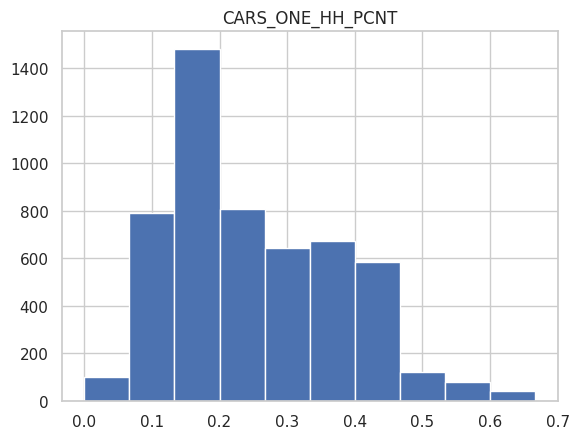

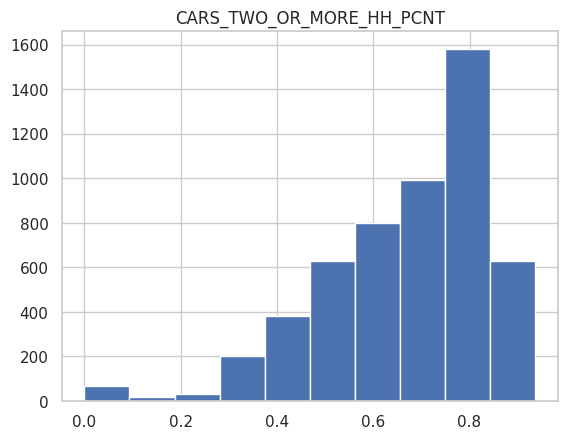

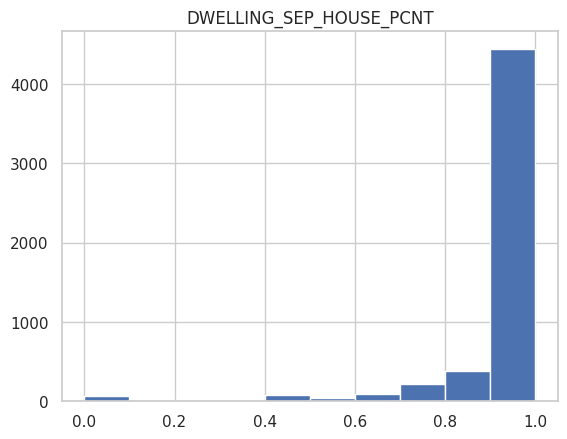

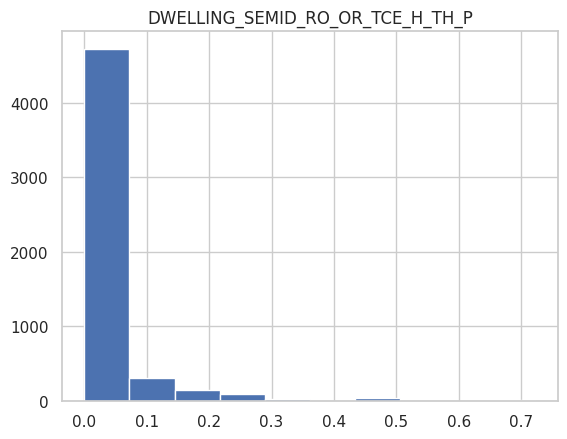

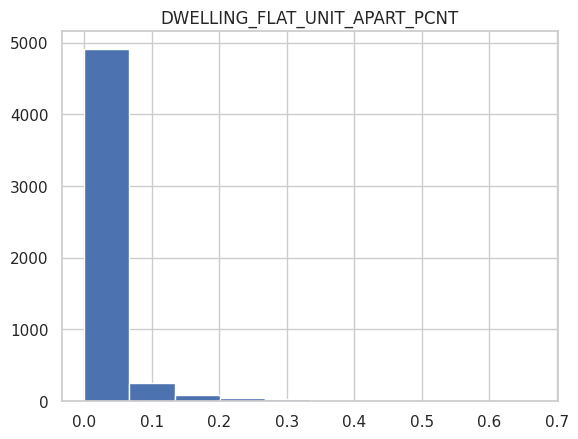

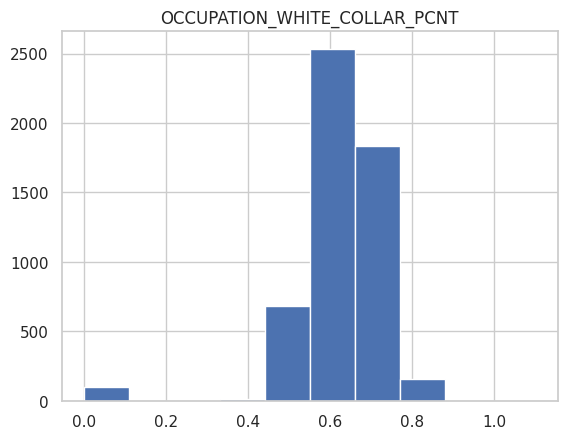

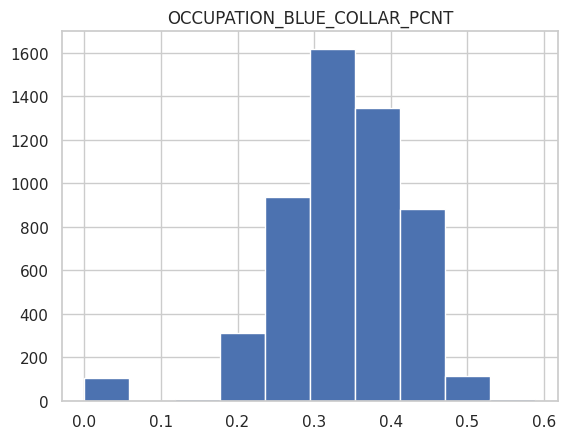

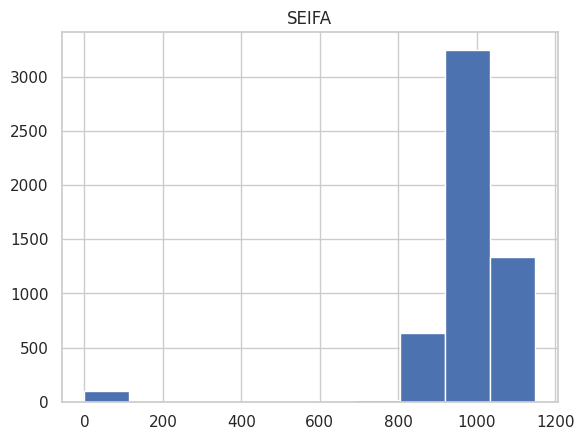

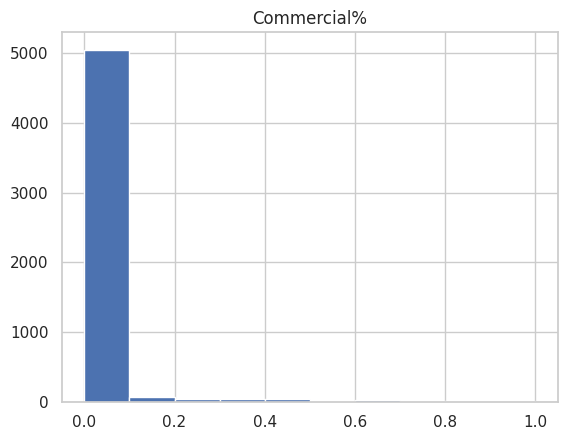

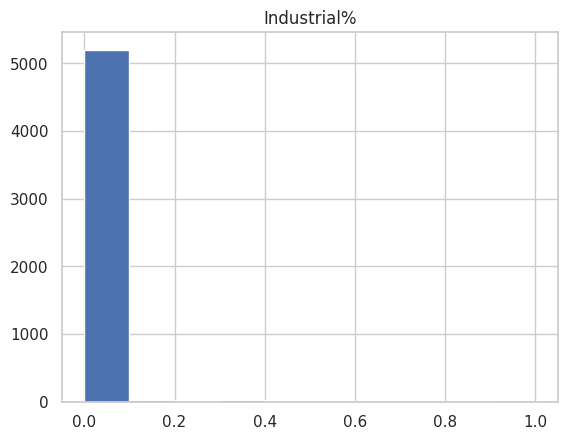

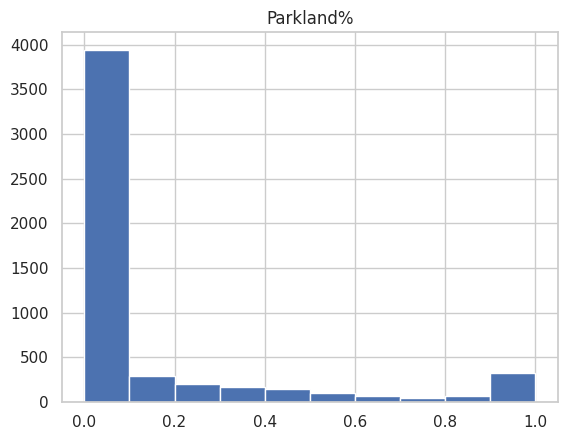

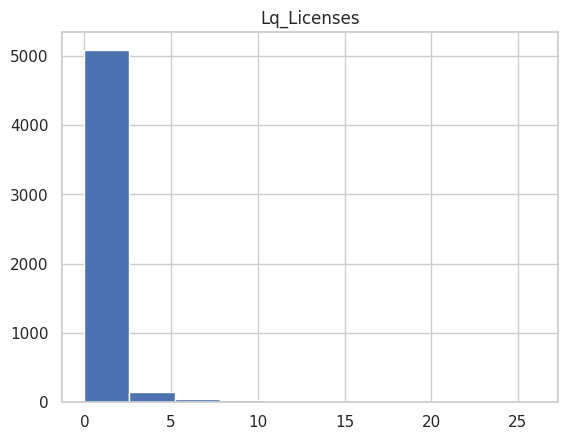

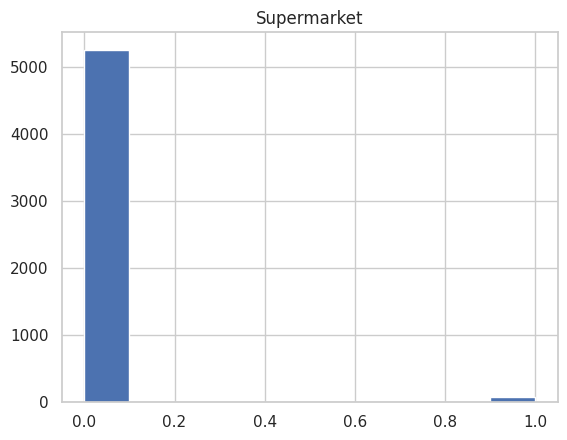

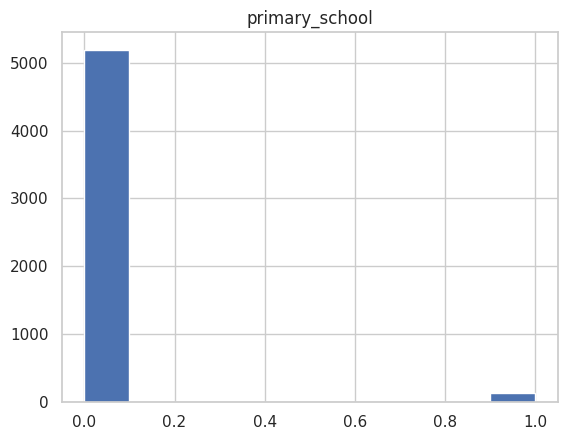

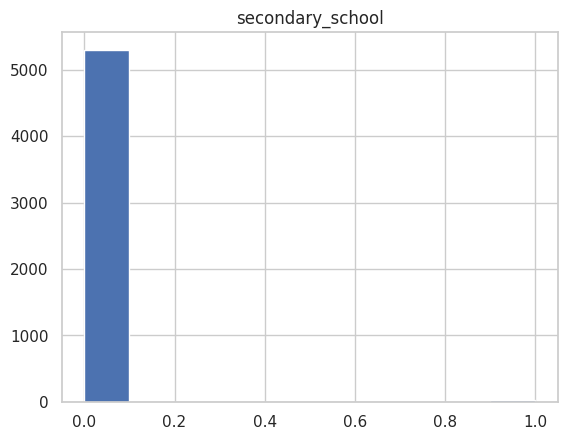

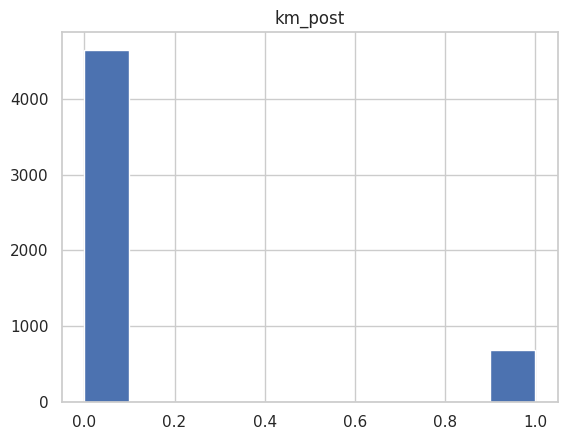

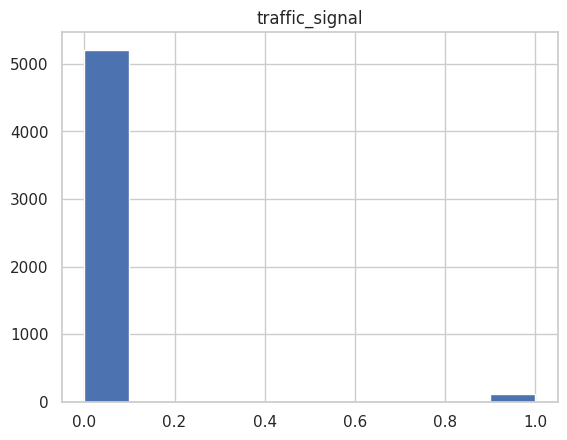

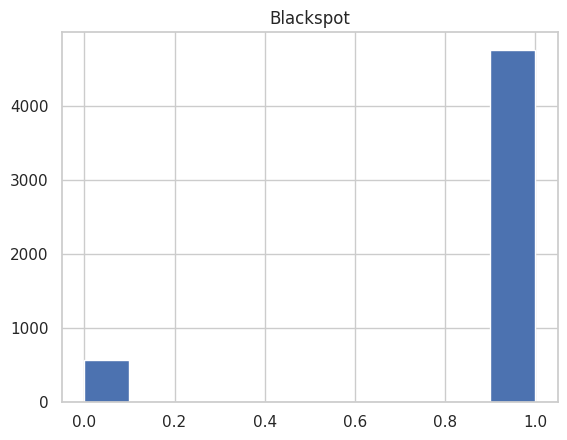

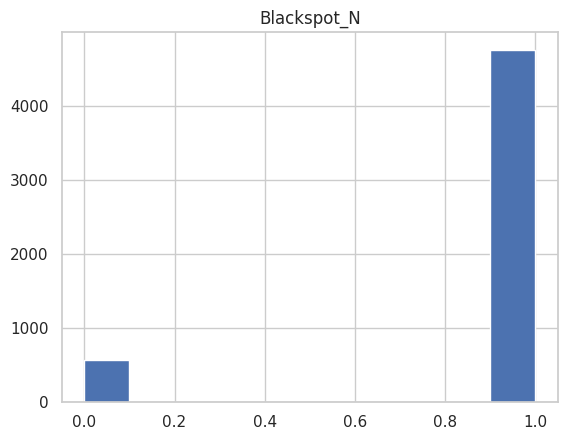

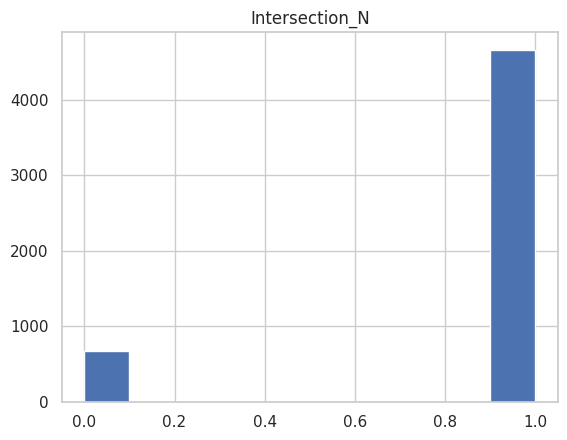

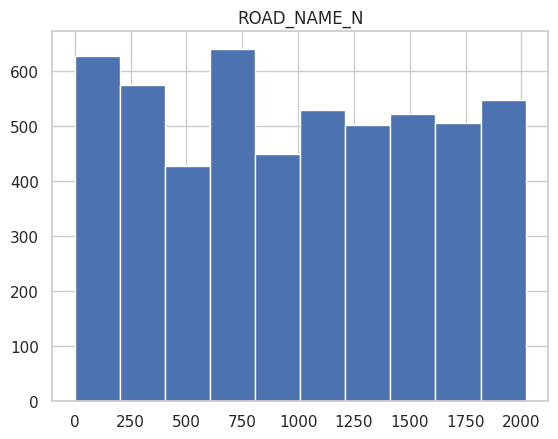

In [ ]:
# Write your code to create histograms for numeric variables
for i in blackspot_data.iloc[:,:]:
    plt.hist(blackspot_data[i])
    plt.title(i)
    plt.show()

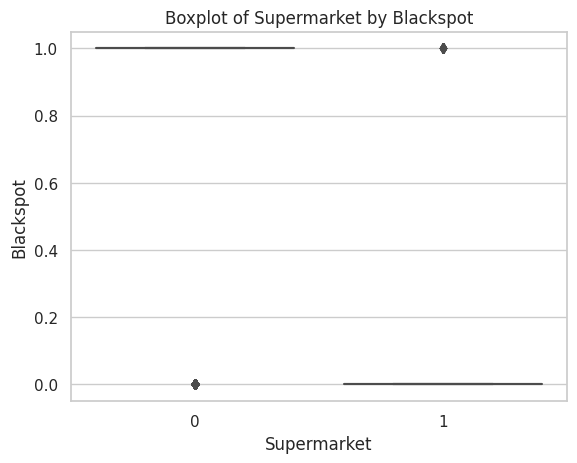

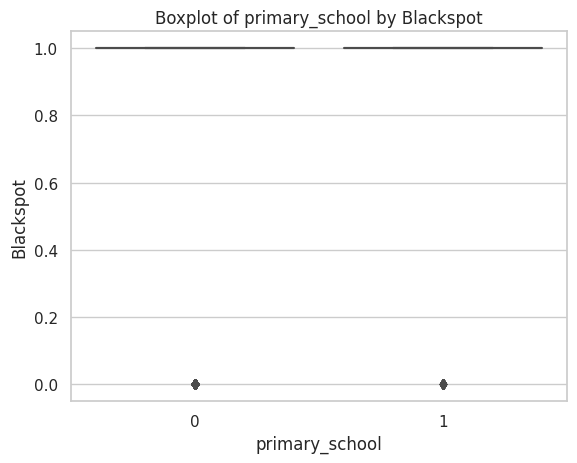

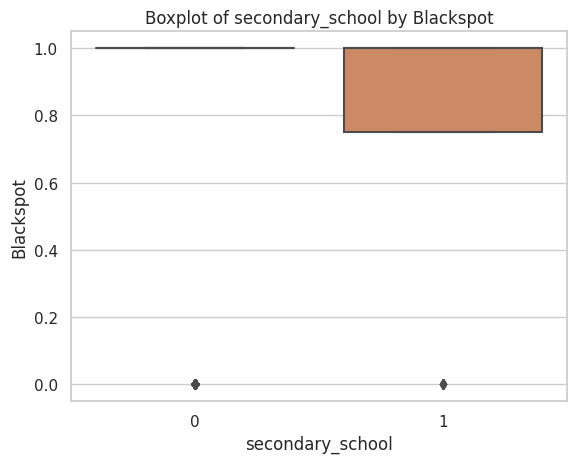

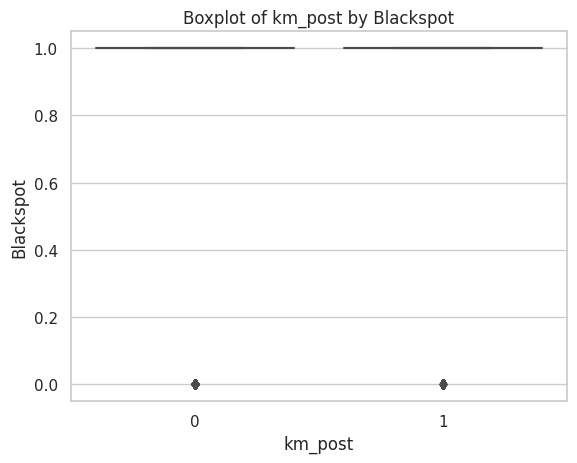

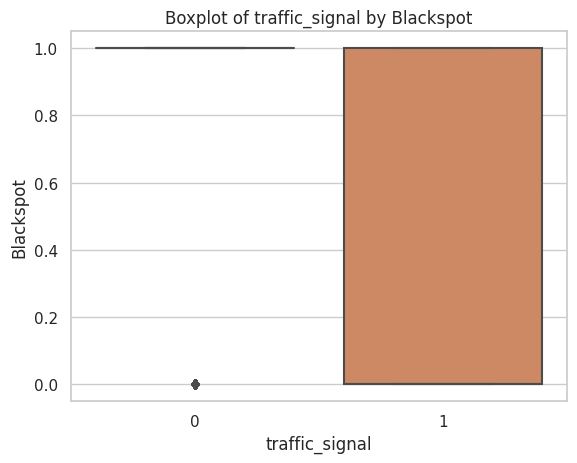

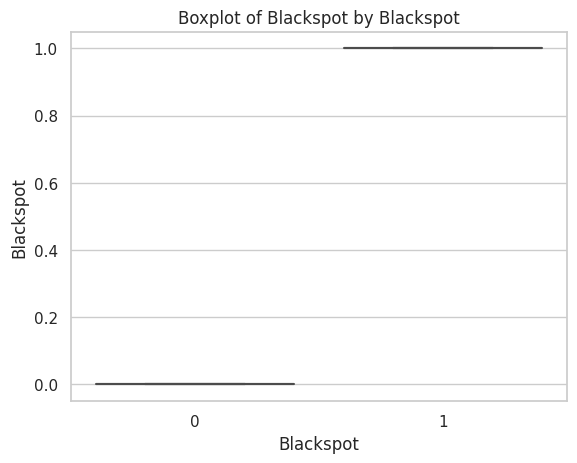

In [ ]:
for i in blackspot_data.columns[30:36]:
    sns.boxplot(data=blackspot_data, x=i, y='Blackspot')
    plt.title(f'Boxplot of {i} by Blackspot')
    plt.show()

In [ ]:
# Import libraries
import pandas as pd #for data manipulation and analysis
import numpy as np

import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split # Import train_test_split function
from sklearn import metrics #Import scikit-learn metrics module for model evaluation
from sklearn.metrics import precision_recall_curve, precision_recall_curve, classification_report
from sklearn.metrics import classification_report, confusion_matrix

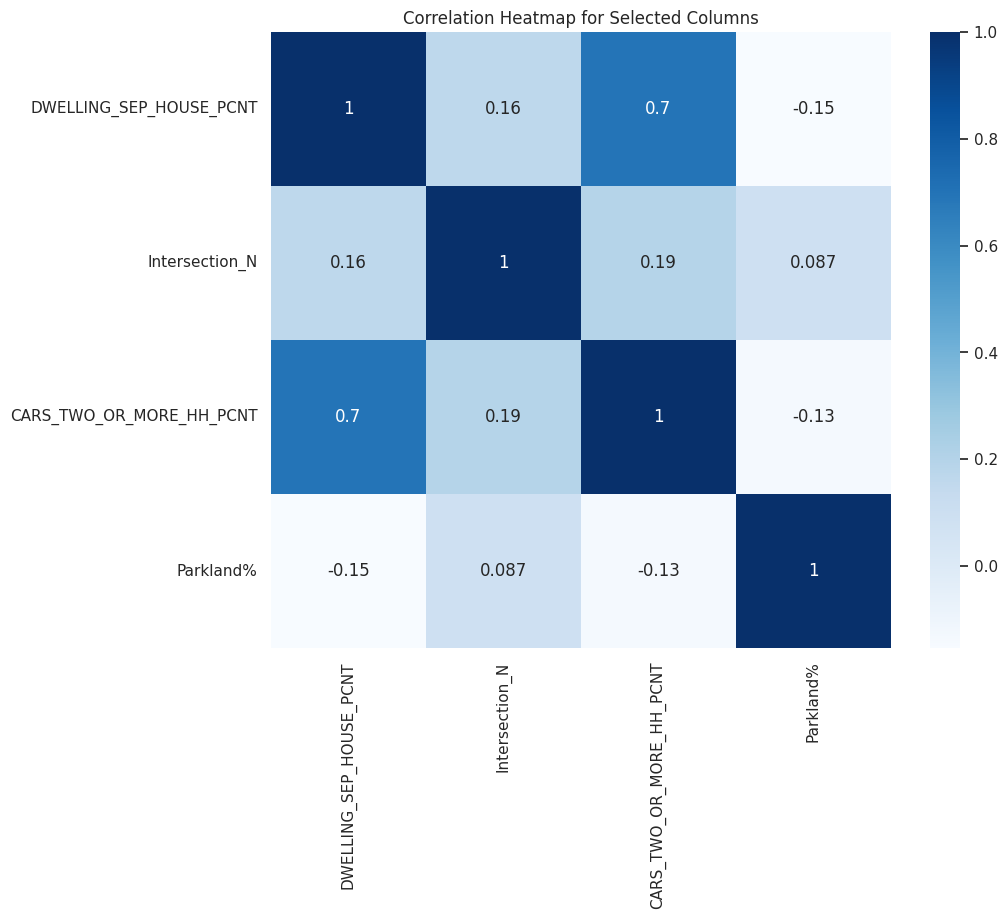

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt


# Select specific columns for correlation
columns_of_interest = ['DWELLING_SEP_HOUSE_PCNT','Intersection_N','CARS_TWO_OR_MORE_HH_PCNT','Parkland%']

# Calculate the correlation matrix for selected columns
correlation_matrix = blackspot_data[columns_of_interest].corr()

# Create a larger heatmap for the selected columns
plt.figure(figsize=(10, 8))  # Adjust the figsize as needed
sns.heatmap(data=correlation_matrix, cmap='Blues', annot=True)
plt.title('Correlation Heatmap for Selected Columns')
plt.show()

Plotting biomarkers and diagnosis using a logistic relationship

<Axes: xlabel='Intersection_N', ylabel='Blackspot_N'>

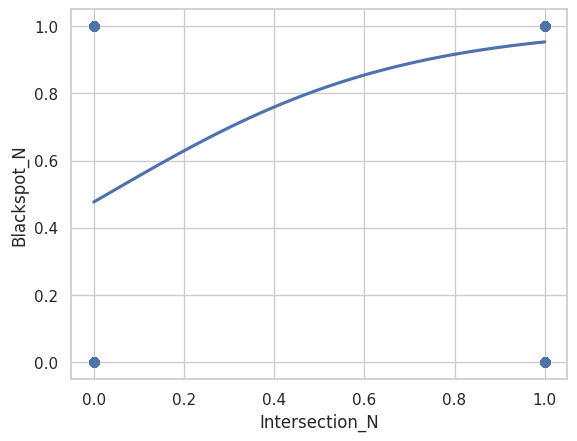

In [ ]:
sns.regplot(x=blackspot_data['Intersection_N'], y=blackspot_data['Blackspot_N'], logistic=True,ci=None)

/usr/local/lib/python3.10/dist-packages/statsmodels/genmod/generalized_linear_model.py:1257: PerfectSeparationWarning: Perfect separation or prediction detected, parameter may not be identified
  warnings.warn(msg, category=PerfectSeparationWarning)
/usr/local/lib/python3.10/dist-packages/statsmodels/genmod/generalized_linear_model.py:1257: PerfectSeparationWarning: Perfect separation or prediction detected, parameter may not be identified
  warnings.warn(msg, category=PerfectSeparationWarning)
/usr/local/lib/python3.10/dist-packages/statsmodels/genmod/generalized_linear_model.py:1257: PerfectSeparationWarning: Perfect separation or prediction detected, parameter may not be identified
  warnings.warn(msg, category=PerfectSeparationWarning)
/usr/local/lib/python3.10/dist-packages/statsmodels/genmod/generalized_linear_model.py:1257: PerfectSeparationWarning: Perfect separation or prediction detected, parameter may not be identified
  warnings.warn(msg, category=PerfectSeparationWarning)


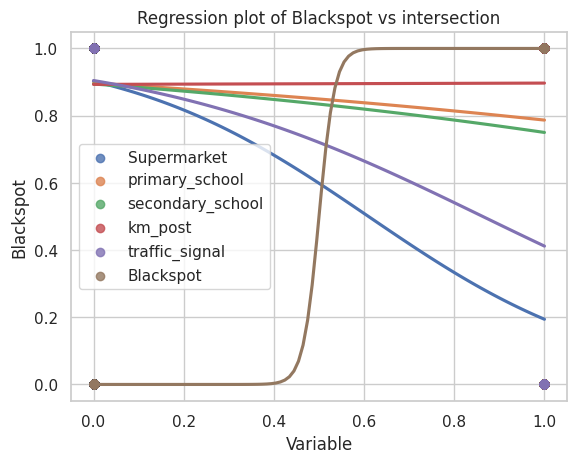

In [ ]:
#Do it for other variables
for i in blackspot_data.columns[30:36]:
    sns.regplot(data=blackspot_data, x=i, y=blackspot_data['Blackspot_N'], logistic=True, ci=None, label=i)

plt.xlabel('Variable')  # Set x-axis label
plt.ylabel('Blackspot')  # Set y-axis label
plt.title('Regression plot of Blackspot vs intersection')  # Set title
plt.legend()# Display

## Import libraries

In [ ]:
# Import libraries
import pandas as pd #for data manipulation and analysis
import numpy as np

import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split # Import train_test_split function
from sklearn import metrics #Import scikit-learn metrics module for model evaluation
from sklearn.metrics import precision_recall_curve, precision_recall_curve, classification_report
from sklearn.metrics import classification_report, confusion_matrix

In [ ]:
print(blackspot_data.sample(10))

        ID  EZI_ROAD_NAME  ROAD_NAME  ROAD_TYPE  AGE_LESS_THAN_15YRS_PCNT  \
3464  9239           1135       1053          4                         0   
4566  9215           1848       1712          3                         0   
4704   578           1217       1126          4                         0   
3941  2948           2049       1895          4                         0   
4233  9347            556        519          0                         0   
3721  6914           2080       1921          4                         0   
2778  5822           1469       1361          3                         0   
2973  6645           2075       1917          3                         0   
2756  9218            951        881          3                         0   
15    1707           2050       1896          3                         0   

      AGE_15_24YRS_PCNT  AGE_25_44YRS_PCNT  AGE_45_64YRS_PCNT  \
3464                  0                  0                  0   
4566                  

## Select Features and Target
Select predictors for classification set role(Target)

In [ ]:
blackspot_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5326 entries, 0 to 5325
Data columns (total 39 columns):
 #   Column                           Non-Null Count  Dtype  
---  ------                           --------------  -----  
 0   ID                               5326 non-null   int64  
 1   EZI_ROAD_NAME                    5326 non-null   int64  
 2   ROAD_NAME                        5326 non-null   int64  
 3   ROAD_TYPE                        5326 non-null   int64  
 4   AGE_LESS_THAN_15YRS_PCNT         5326 non-null   float64
 5   AGE_15_24YRS_PCNT                5326 non-null   float64
 6   AGE_25_44YRS_PCNT                5326 non-null   float64
 7   AGE_45_64YRS_PCNT                5326 non-null   float64
 8   AGE_18YRS_OVER_PCNT              5326 non-null   float64
 9   AGE_65YRS_OVER_PCNT              5326 non-null   float64
 10  SEO_PERSONS_PCNT                 5326 non-null   float64
 11  FC_COUPLE_NO_CHILDREN_PCNT       5326 non-null   float64
 12  FC_COUPLE_WITH_CHILD

In [ ]:
#Selecting predictors
features = ['DWELLING_SEP_HOUSE_PCNT','Intersection_N','CARS_TWO_OR_MORE_HH_PCNT','Parkland%'] #you can select a range of columns features = records.columns[0:5]

#complete the code below
X = blackspot_data[features]
y = blackspot_data.Blackspot

## Split the Dataset

In [ ]:
# Split dataset into training set and test set
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=1)  # 80% training and 20% testing

In [ ]:
#inspect the split datasets
print(X_train.info())
print(X_test.info())

<class 'pandas.core.frame.DataFrame'>
Int64Index: 4260 entries, 593 to 5157
Data columns (total 4 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   DWELLING_SEP_HOUSE_PCNT   4260 non-null   float64
 1   Intersection_N            4260 non-null   int64  
 2   CARS_TWO_OR_MORE_HH_PCNT  4260 non-null   float64
 3   Parkland%                 4260 non-null   float64
dtypes: float64(3), int64(1)
memory usage: 166.4 KB
None
<class 'pandas.core.frame.DataFrame'>
Int64Index: 1066 entries, 4817 to 2027
Data columns (total 4 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   DWELLING_SEP_HOUSE_PCNT   1066 non-null   float64
 1   Intersection_N            1066 non-null   int64  
 2   CARS_TWO_OR_MORE_HH_PCNT  1066 non-null   float64
 3   Parkland%                 1066 non-null   float64
dtypes: float64(3), int64(1)
memory usage: 41.6 KB
None


## Train a Logistic Regression Model and Make Predictions
(Model implementation)

Train a model using the training dataset
Make prediction using the model for the test dataset

In [ ]:
#Create an initial Logistic Regression model
logreg = LogisticRegression(max_iter=100)

In [ ]:
# Complete the code to train Logistic Regression Classifer with the traning dataset
logreg = logreg.fit(X_train, y_train)

In [ ]:
#Complete the code to make predictions for the test dataset
y_pred = logreg.predict(X_test)

## Inspect Predictions

In [ ]:
#join unseen y_test with predicted value into a data frame
inspection=pd.DataFrame({'Actual':y_test, 'Predicted':y_pred})

#join X_test with the new dataframe
inspection=pd.concat([X_test,inspection], axis=1)

inspection.head(20)

DWELLING_SEP_HOUSE_PCNT  Intersection_N  CARS_TWO_OR_MORE_HH_PCNT  \
4817                        1               1                         1   
1039                        1               1                         1   
4700                        1               1                         1   
3194                        1               1                         1   
440                         1               0                         1   
1034                        1               1                         1   
4166                        1               1                         1   
3546                        1               1                         1   
4365                        1               0                         0   
1774                        1               1                         1   
2847                        1               1                         1   
4926                        1               1                         1   
5160                        1               0                         0   
988                         1               1                         1   
2488                        1               1                         1   
3227                        1               1                         0   
4743                        1               1                         1   
1385                        1               1                         0   
5306                        1               1                         1   
2424                        1               1                         1   

      Parkland%  Actual  Predicted  
4817          0       1          1  
1039          0       1          1  
4700          1       1          1  
3194          1       1          1  
440           0       1          0  
1034          0       1          1  
4166          0       1          1  
3546          0       1          1  
4365          0       1          0  
1774          0       1          1  
2847          0       1          1  
4926          0       1          1  
5160          0       0          0  
988           0       1          1  
2488          0       1          1  
3227          0       1          1  
4743          0       1          1  
1385          0       1          1  
5306          0       1          1  
2424          0       1          1

##Evaluate Model Performance
(Performance Evaluation)

Calculate Accuracy, Precision, Recall, F1

In [ ]:
#call metrics functions: Accuracy, Precision, Recall, F1 using the parameters y_test and y_pred
print("Accuracy: ", metrics.accuracy_score(y_test,y_pred))
print("Precision: ", metrics.precision_score(y_test,y_pred))
print("Recall: ", metrics.recall_score(y_test,y_pred))
print("F1: ", metrics.f1_score(y_test,y_pred))

Accuracy:  0.9155722326454033
Precision:  0.9402228976697061
Recall:  0.9676746611053181
F1:  0.9537512846865365


##Interpret the above

In [ ]:
#print confusion matrix and evaluation report
cm = confusion_matrix(y_test, y_pred)
print(cm)
print(classification_report(y_test,y_pred))

[[ 48  59]
 [ 31 928]]
              precision    recall  f1-score   support

           0       0.61      0.45      0.52       107
           1       0.94      0.97      0.95       959

    accuracy                           0.92      1066
   macro avg       0.77      0.71      0.73      1066
weighted avg       0.91      0.92      0.91      1066



Plot ROC (Receiver operating characteristic) curve and confusion matrix

In [ ]:
# First get the probabilities of the classes on the test set
probabilities = logreg.predict_proba(X_test)

In [ ]:
#Now get the probabilities for the positive class
y_prob = probabilities[:,1]

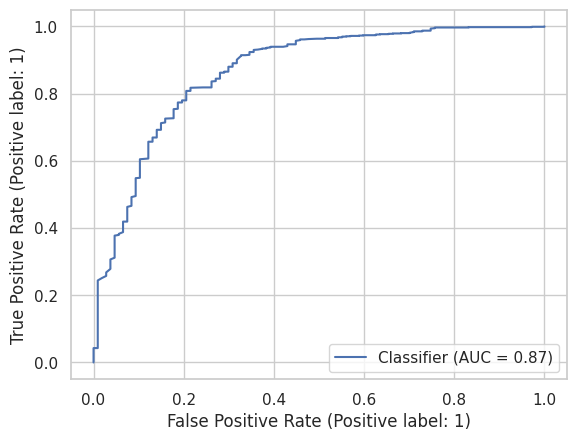

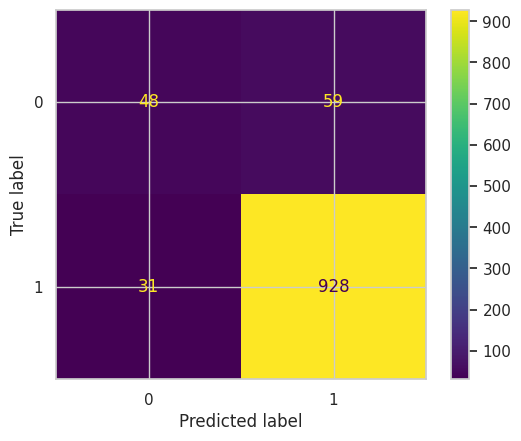

In [ ]:
#import classes to display RocCurve and Confusion Matrix
from sklearn.metrics import RocCurveDisplay
from sklearn.metrics import ConfusionMatrixDisplay

#complete the code to display RocCurve and Confusion Matrix
RocCurveDisplay.from_predictions(y_test, y_prob)
ConfusionMatrixDisplay.from_predictions(y_test, y_pred)
plt.show()

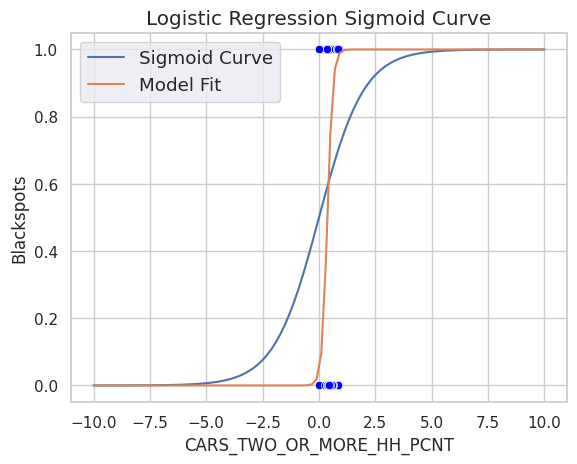

In [ ]:
# Define the sigmoid function
def sigmoid(x):
    return 1 / (1 + np.exp(-x))

# Generate a sequence of points along the x axis
x_vals = np.linspace(-10, 10, 100)

# Calculate the corresponding y values using the model coefficients
coef = logreg.coef_.flatten()
intercept = logreg.intercept_

# Calculate the y values for the model fit using the sigmoid function
model_y_vals = sigmoid(np.dot(np.column_stack([x_vals]*coef.shape[0]), coef) + intercept)

# Plot the sigmoid curve using seaborn
sns.lineplot(x=x_vals, y=sigmoid(x_vals), label='Sigmoid Curve')
sns.lineplot(x=x_vals, y=model_y_vals, label='Model Fit')  # Use the calculated model y values
sns.set_style('darkgrid')
sns.set_context('notebook', font_scale=1.2)
sns.scatterplot(x=X_test['CARS_TWO_OR_MORE_HH_PCNT'], y=y_test, color='blue')
plt.xlabel('CARS_TWO_OR_MORE_HH_PCNT')
plt.ylabel('Blackspots')
plt.title('Logistic Regression Sigmoid Curve')
plt.legend()
plt.show()

Axes(0.125,0.11;0.775x0.77)


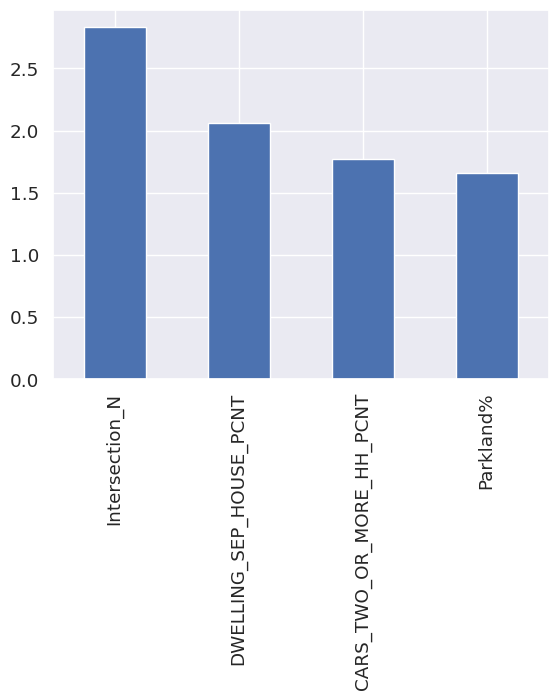

In [ ]:
#Visualise the coefficients
coefs = pd.Series(logreg.coef_[0], index=X.columns.values)
print (coefs.sort_values(ascending = False).plot(kind='bar'))

In [ ]:
# Print the model formula
print('Blackspot =', '%.3f' % intercept, '+',
      '%.3f' % coef[0], '* Intersection_N +',
      '%.3f' % coef[1], '* DWELLING_SEP_HOUSE_PCNT +',
      '%.3f' % coef[2], '* CARS_TWO_OR_MORE_HH_PCNT +',
      '%.3f' % coef[3], '* Parkland%')

Blackspot = -3.084 + 2.060 * Intersection_N + 2.830 * DWELLING_SEP_HOUSE_PCNT + 1.776 * CARS_TWO_OR_MORE_HH_PCNT + 1.658 * Parkland%


# Tree Model and Make Predictions

In [ ]:
!pip install pydotplus #interface for graph visualisation
!pip install graphviz #for graph visualisation

In [ ]:
# import libraries
import pandas as pd #for data manipulation and analysis
import numpy as np

import seaborn as sns
import matplotlib.pyplot as plt
#from pandas.io.parsers.readers import annotations

from sklearn.tree import DecisionTreeClassifier # Import Decision Tree Classifi

from sklearn.model_selection import train_test_split # Import train_test_split function
from sklearn import metrics #Import scikit-learn metrics module for model evaluation

#print confusion matrix and evaluation report
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.metrics import RocCurveDisplay
from sklearn.metrics import ConfusionMatrixDisplay

# Split the Dataset

In [ ]:
# Split dataset into training set and test set
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=1, stratify=y)  # 80% training and 20% testing

#inspect the split datasets
print(X_train.head())
print(y_train.head())

print('Training dataset size:',X_train.shape[0])
print('Test dataset size:',X_test.shape[0])


      DWELLING_SEP_HOUSE_PCNT  Intersection_N  CARS_TWO_OR_MORE_HH_PCNT  \
1019                        1               1                         1   
3564                        1               1                         1   
2072                        1               1                         1   
352                         1               1                         1   
278                         1               0                         1   

      Parkland%  
1019          0  
3564          1  
2072          0  
352           0  
278           0  
1019    1
3564    1
2072    1
352     1
278     0
Name: Blackspot, dtype: int64
Training dataset size: 4260
Test dataset size: 1066


## **1.8 Train a Decision Tree Model and Make Predictions**

(Model implementation)

1.  Initialise /create an empty object decisiontreeclassifier (model)
2.  Train the model using the training dataset
3.  Make prediction using the model for the test dataset

In [ ]:
# Create Decision Tree classifier object
clf = DecisionTreeClassifier(criterion="entropy", max_depth=3) #default criterion is gini, max_depth=25

In [ ]:
# Train Decision Tree Classifer with the traning dataset
clf = clf.fit(X_train, y_train)


In [ ]:
#Make predictions for the test dataset
y_pred = clf.predict(X_test)


Inspect Predictions

This is for learning purposes, so you can feel what predictions look like.

In [ ]:
#join unseen y_test with predicted value into a data frame
inspection=pd.DataFrame({'Actual':y_test, 'Predicted':y_pred})

#join X_test with the new dataframe
inspection=pd.concat([X_test,inspection], axis=1)

inspection.sample(20)

DWELLING_SEP_HOUSE_PCNT  Intersection_N  CARS_TWO_OR_MORE_HH_PCNT  \
3857                        1               1                         1   
2826                        1               1                         1   
930                         1               0                         1   
4870                        1               1                         1   
4671                        1               1                         1   
564                         1               1                         1   
2376                        1               1                         1   
875                         1               1                         1   
3971                        1               1                         0   
5094                        1               1                         1   
47                          1               1                         1   
192                         1               1                         1   
2479                        1               1                         0   
4601                        1               1                         1   
1194                        1               1                         1   
1387                        1               1                         0   
1935                        1               0                         1   
4977                        1               1                         1   
2097                        1               1                         1   
3609                        1               0                         0   

      Parkland%  Actual  Predicted  
3857          1       1          1  
2826          0       1          1  
930           0       1          1  
4870          0       1          1  
4671          0       1          1  
564           0       1          1  
2376          0       1          1  
875           0       1          1  
3971          0       1          1  
5094          0       1          1  
47            0       1          1  
192           0       1          1  
2479          0       1          1  
4601          0       1          1  
1194          0       1          1  
1387          0       1          1  
1935          0       1          1  
4977          0       1          1  
2097          0       1          1  
3609          0       1          0

In [ ]:
clf.score(X_test,y_test)

0.9155722326454033

In [ ]:
clf.score(X_train,y_train)


0.9169014084507042

In [ ]:
metrics.accuracy_score(y_pred,y_test)

0.9155722326454033

Evaluate Model Performance
(Performance Evaluation)

Generate confusion matrix and classification report
Calculate Accuracy, Precision, Recall, F1 separately when needed

In [ ]:
#print confusion matrix and evaluation report
from sklearn.metrics import classification_report, confusion_matrix
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))

[[ 40  73]
 [ 17 936]]
              precision    recall  f1-score   support

           0       0.70      0.35      0.47       113
           1       0.93      0.98      0.95       953

    accuracy                           0.92      1066
   macro avg       0.81      0.67      0.71      1066
weighted avg       0.90      0.92      0.90      1066



## Plot ROC (Receiver operating characteristic) curve and confusion matrix

In [ ]:
#get predicted probabilities for the main class
y_pred_probs = clf.predict_proba(X_test)
y_pred_probs = y_pred_probs[:, 1]
y_pred_probs

array([0.97278411, 0.97278411, 0.97278411, ..., 0.97278411, 0.97278411,
       0.97278411])

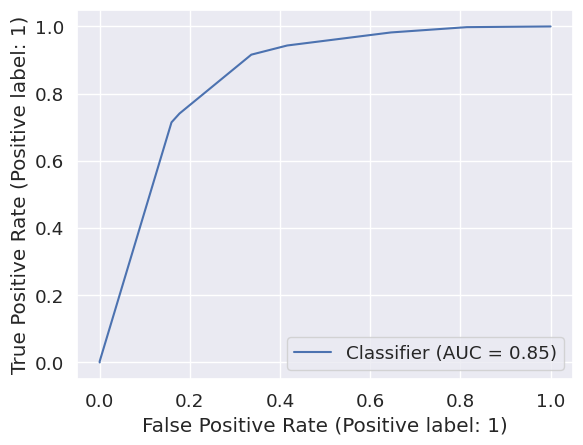

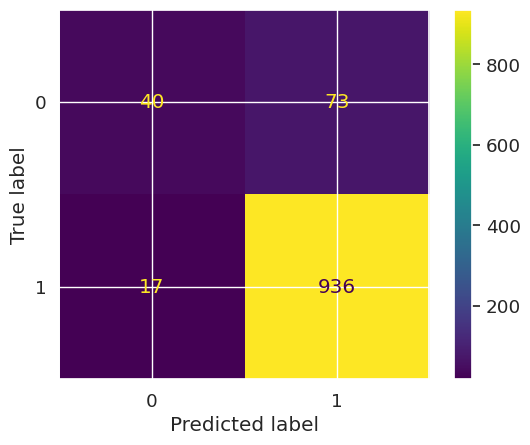

In [ ]:
from sklearn.metrics import RocCurveDisplay
from sklearn.metrics import ConfusionMatrixDisplay

RocCurveDisplay.from_predictions(y_test, y_pred_probs)
ConfusionMatrixDisplay.from_predictions(y_test, y_pred)
plt.show()

## Visualise the trees

Option 1: Extract rules and visualise the model

In [ ]:
#Import plot_tree to  extract rules and visualise the decition tree model
from sklearn.tree import plot_tree, export_text
from pandas.io.parsers.readers import annotations

In [ ]:
# Convert feature_names to a list if it's an Index object
feature_names = list(features) if isinstance(features, pd.Index) else features

# Extract the decision rules
rules = export_text(clf, feature_names=feature_names)
print(rules)

|--- Intersection_N <= 0.50
|   |--- CARS_TWO_OR_MORE_HH_PCNT <= 0.54
|   |   |--- DWELLING_SEP_HOUSE_PCNT <= 0.77
|   |   |   |--- class: 0
|   |   |--- DWELLING_SEP_HOUSE_PCNT >  0.77
|   |   |   |--- class: 0
|   |--- CARS_TWO_OR_MORE_HH_PCNT >  0.54
|   |   |--- Parkland% <= 0.75
|   |   |   |--- class: 1
|   |   |--- Parkland% >  0.75
|   |   |   |--- class: 1
|--- Intersection_N >  0.50
|   |--- DWELLING_SEP_HOUSE_PCNT <= 0.76
|   |   |--- Parkland% <= 0.15
|   |   |   |--- class: 1
|   |   |--- Parkland% >  0.15
|   |   |   |--- class: 1
|   |--- DWELLING_SEP_HOUSE_PCNT >  0.76
|   |   |--- DWELLING_SEP_HOUSE_PCNT <= 0.97
|   |   |   |--- class: 1
|   |   |--- DWELLING_SEP_HOUSE_PCNT >  0.97
|   |   |   |--- class: 1



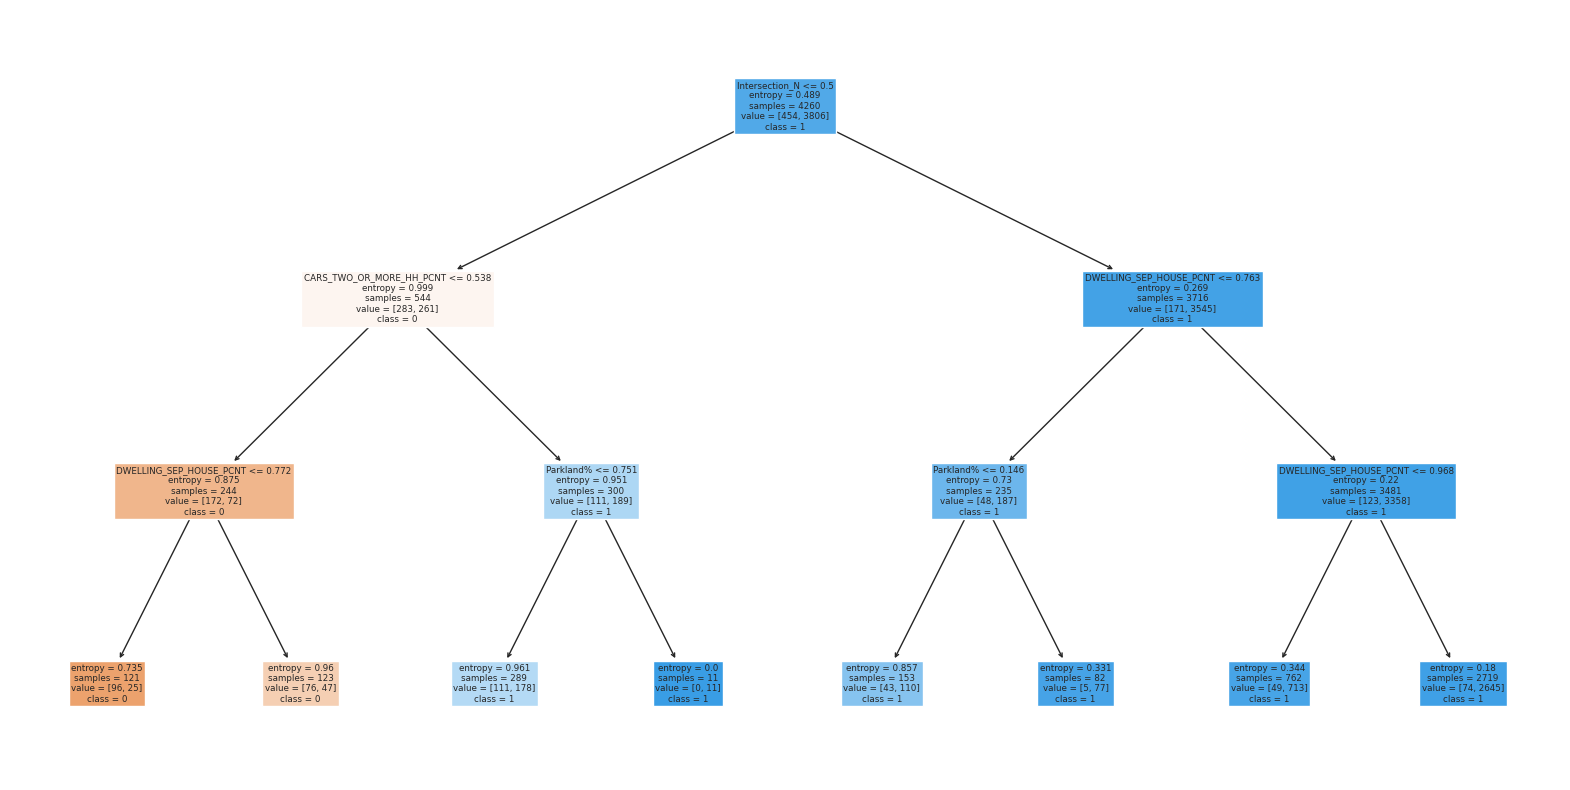

In [ ]:
# visualize the decision tree
plt.figure(figsize=(20,10))
plot_tree(clf, filled=True, feature_names=features, class_names=['0','1'])
plt.show()

In [ ]:
#call metrics functions: Accuracy, Precision, Recall, F1 using the parameters y_test and y_pred
print("Accuracy: ", metrics.accuracy_score(y_test,y_pred))
print("Precision: ", metrics.precision_score(y_test,y_pred))
print("Recall: ", metrics.recall_score(y_test,y_pred))
print("F1: ", metrics.f1_score(y_test,y_pred))

Accuracy:  0.9155722326454033
Precision:  0.9276511397423192
Recall:  0.9821615949632738
F1:  0.9541284403669725


Discuss the Interpretability vs Explainability of the model

Interpretability relates to understanding how a machine learning model works, i.e., how it makes predictions based on input data.

Explainability focuses on whether the model's decision-making process makes sense from a human perspective.

An explainable model not only provides predictions but also provides human-understandable explanations or justifications for those predictions.

#Use pydotplus

In [ ]:
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

# Assuming 'X' is your feature matrix and 'y' is your target variable
# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Create and fit the linear regression model
model = LinearRegression()
model.fit(X_train, y_train)

# Make predictions on the test set
y_pred = model.predict(X_test)

# Calculate Mean Absolute Error (MAE)
mae = mean_absolute_error(y_test, y_pred)

# Calculate Mean Squared Error (MSE)
mse = mean_squared_error(y_test, y_pred)

# Calculate Root Mean Squared Error (RMSE)
rmse = np.sqrt(mse)

# Calculate R-squared (R2)
r2 = r2_score(y_test, y_pred)

print(f"Mean Absolute Error (MAE): {mae:.2f}")
print(f"Mean Squared Error (MSE): {mse:.2f}")
print(f"Root Mean Squared Error (RMSE): {rmse:.2f}")
print(f"R-squared (R2): {r2:.2f}")

Mean Absolute Error (MAE): 0.14
Mean Squared Error (MSE): 0.07
Root Mean Squared Error (RMSE): 0.26
R-squared (R2): 0.25


In [ ]:
import six
import sys
sys.modules['sklearn.externals.six'] = six

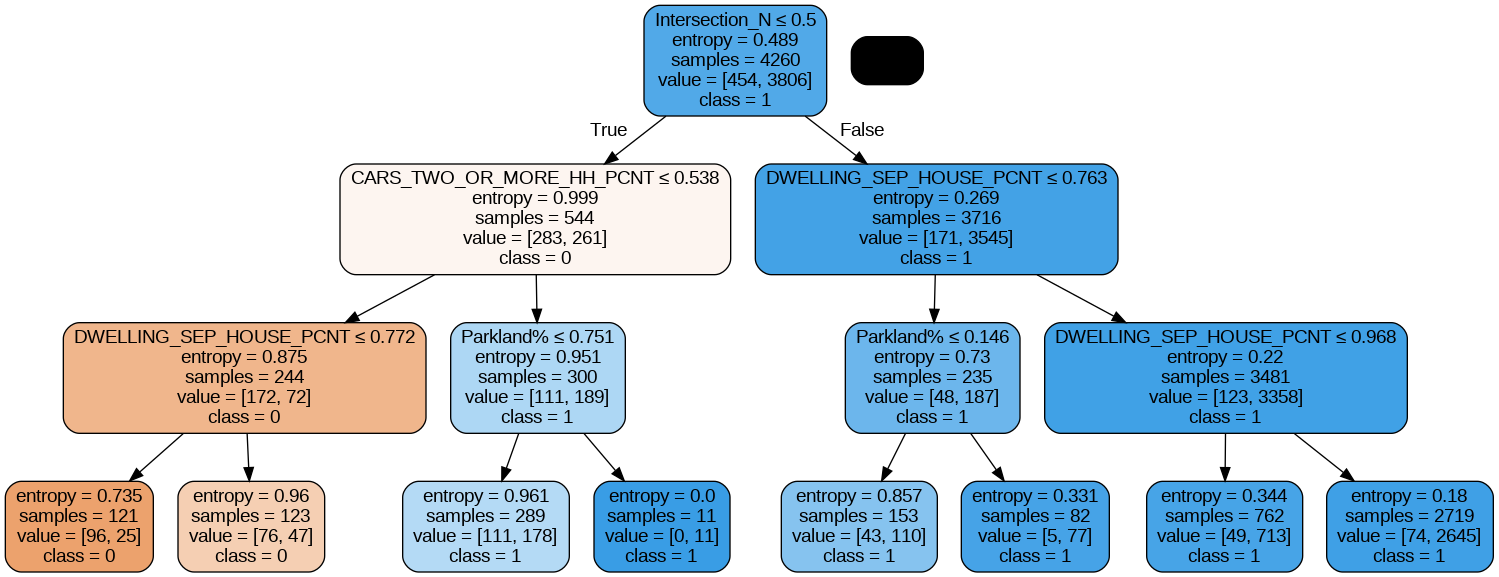

In [ ]:
#Import libraries and classes
from six import StringIO
from sklearn.tree import export_graphviz
from sklearn.externals.six import StringIO
from IPython.display import Image
import pydotplus

dot_data = StringIO()
export_graphviz(clf, out_file=dot_data,
                filled=True, rounded=True,
                special_characters=True,feature_names = features,class_names=['0','1'])
graph = pydotplus.graph_from_dot_data(dot_data.getvalue())
graph.write_png('Biopsy.png')
Image(graph.create_png())

# Comparing all models
Choosing the best one

In [ ]:
#Import Necessary Libraries:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression, LogisticRegression
from sklearn.tree import DecisionTreeClassifier  # Import Decision Tree Classifier
from sklearn.metrics import mean_squared_error, accuracy_score, r2_score

# Assuming you have loaded your data and split it into features ('X') and target ('y') variables:
# Split Data into Train and Test Sets:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Create and Fit Models:
# Linear Regression
linear_model = LinearRegression()
linear_model.fit(X_train, y_train)

# Multivariate Linear Regression (if you have multiple features)
multilinear_model = LinearRegression()
multilinear_model.fit(X_train, y_train)

# Logistic Regression
logistic_model = LogisticRegression()
logistic_model.fit(X_train, y_train)

# Decision Tree Classifier
tree_model = DecisionTreeClassifier(random_state=42)
tree_model.fit(X_train, y_train)

# Make Predictions
linear_preds = linear_model.predict(X_test)
multilinear_preds = multilinear_model.predict(X_test)
logistic_preds = logistic_model.predict(X_test)
tree_preds = tree_model.predict(X_test)

# Calculate Evaluation Metrics:
# Linear Regression
linear_mse = mean_squared_error(y_test, linear_preds)
linear_r2 = r2_score(y_test, linear_preds)

# Multivariate Linear Regression
multilinear_mse = mean_squared_error(y_test, multilinear_preds)
multilinear_r2 = r2_score(y_test, multilinear_preds)

# Logistic Regression
logistic_accuracy = accuracy_score(y_test, logistic_preds)

# Decision Tree Classifier
tree_accuracy = accuracy_score(y_test, tree_preds)

# Compare Performance:
print(f"Linear Regression MSE: {linear_mse:.2f}, R-squared: {linear_r2:.2f}")
print(f"Multivariate Linear Regression MSE: {multilinear_mse:.2f}, R-squared: {multilinear_r2:.2f}")
print(f"Logistic Regression Accuracy: {logistic_accuracy:.2f}")
print(f"Decision Tree Accuracy: {tree_accuracy:.2f}")

# Compare based on R-squared for regression models and accuracy for the classification models
best_model = None
if linear_r2 > multilinear_r2 and linear_r2 > logistic_accuracy and linear_r2 > tree_accuracy:
    best_model = "Linear Regression"
elif multilinear_r2 > linear_r2 and multilinear_r2 > logistic_accuracy and multilinear_r2 > tree_accuracy:
    best_model = "Multivariate Linear Regression"
elif logistic_accuracy > tree_accuracy:
    best_model = "Logistic Regression"
else:
    best_model = "Decision Tree"

print(f"The best performing model is: {best_model}")


Linear Regression MSE: 0.07, R-squared: 0.25
Multivariate Linear Regression MSE: 0.07, R-squared: 0.25
Logistic Regression Accuracy: 0.91
Decision Tree Accuracy: 0.89
The best performing model is: Logistic Regression
